In [1]:
from graph_tool.all import *

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-rjmds53v because the default path (/home/user/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [3]:
# utils

def get_contacts_fast(G, attr1=None):
    e=G.get_edges()
    v=G.get_vertices(vprops=[G.vp['age']])

    acp=np.vstack((v[e[:,0],1],v[e[:,1],1])).T
    #twins=acp[acp[:,0]==acp[:,1]]
    #others=acp[acp[:,0]!=acp[:,1]]

    
    #return np.vstack((twins,others,others[:,[1,0]]))
    return np.vstack((acp,acp[:,[1,0]]))


def plot_results(purpose, G):
    

    size_window=6.
    precision=1
    #purpose='household'

    fig, ax=plt.subplots(figsize=(size_window,size_window), tight_layout=True)

    age_bins=np.arange(120/precision+1)*precision
    cmap = mpl.cm.get_cmap('RdYlBu_r').copy()
    cmap.set_bad(color='white', alpha=0.1)

    df_ascm=get_contacts_fast(G)
    pp=ax.hist2d(df_ascm[:,0],df_ascm[:,1],bins=age_bins, cmap=cmap, norm=mpl.colors.LogNorm(vmin=1))

    ax.set_xlabel('Age', fontsize='xx-large')
    ax.set_ylabel('Age of contact', fontsize='xx-large')
    ax.set_aspect('equal')
    ax.set_title('{} layer'.format(purpose), fontsize='xx-large')

    cbar=fig.colorbar(pp[3], ax=ax, shrink=.75)
    cbar.set_label('Frequency of contacts',fontsize='x-large',rotation=270, va='bottom')
    
    #fig.savefig('files/{}_weekday.pdf'.format(purpose), bbox_inches='tight')
    fig.savefig('files/{}_weekday.jpg'.format(purpose), bbox_inches='tight', dpi=400)

    plt.show()

In [163]:
graph_all=load_graph('files/graph_weekday_all_updated.xml.gz')
print("ok")
graph_household=load_graph('graph_weekday_household.xml.gz')

ok


In [23]:
print('Number of vertices: {} / Number of edges: {}'.format(graph_all.num_vertices(), graph_all.num_edges()))

Number of vertices: 3527402 / Number of edges: 731131


In [20]:
#graph_household=load_graph('graph_weekday_household.xml.gz')
#graph_work=load_graph('files/archive/graphsA/graph_weekday_work_updated.xml.gz')
#graph_education=load_graph('files/archive/graphsA/graph_weekday_education_updated.xml.gz')
#graph_leisure=load_graph('files/archive/graphsA/graph_weekday_leisure_updated.xml.gz')
#graph_shop=load_graph('files/archive/graphsA/graph_weekday_shop_updated.xml.gz')
#graph_other=load_graph('files/archive/graphsA/graph_weekday_other_updated.xml.gz')

In [692]:
number_of_persons_in_work=pd.read_csv('files/persons_in_work.csv')['person_id'].shape[0]
number_of_persons_in_education=pd.read_csv('files/persons_in_education.csv')['person_id'].shape[0]
number_of_persons_in_leisure=pd.read_csv('files/persons_in_leisure.csv')['person_id'].shape[0]
number_of_persons_in_shop=pd.read_csv('files/persons_in_shop.csv')['person_id'].shape[0]
number_of_persons_in_other=pd.read_csv('files/persons_in_other.csv')['person_id'].shape[0]

f_work=pd.read_csv('files/persons_in_work.csv')['person_id'].values
f_education=pd.read_csv('files/persons_in_education.csv')['person_id'].values
f_leisure=pd.read_csv('files/persons_in_leisure.csv')['person_id'].values
f_shop=pd.read_csv('files/persons_in_shop.csv')['person_id'].values
f_other=pd.read_csv('files/persons_in_other.csv')['person_id'].values

In [691]:
# TESTS


graph_work=load_graph('files/graph_weekday_work_updated.xml.gz')
graph_education=load_graph('files/graph_weekday_education_updated.xml.gz')
graph_leisure=load_graph('files/graph_weekday_leisure_updated.xml.gz')
graph_shop=load_graph('files/graph_weekday_shop_updated.xml.gz')
graph_other=load_graph('files/graph_weekday_other_updated.xml.gz')



print_stats('education', graph_education, f_education)
print_stats('work', graph_work, f_work)

Daily average number of contacts at education layer 3.29 +/- 2.55
Daily average number of contacts at work layer 7.4 +/- 5.86


In [185]:
# SIMULATIONS

def sample(ws=15., n=10):
    mean=ws*(n-1)/(ws+n-1)
    std=np.sqrt(0.2)
    variance=std**2
    
    print('mean is {} / variance is {}'.format(mean, variance))
    

    scale=variance/mean
    shape=mean/scale
    
    avg=np.random.gamma(shape=shape, scale=scale, size=1)[0]

    return np.random.poisson(avg, n)


w=10.


for n in np.random.poisson(5, 10):
    if n>1:
            
        print('Size of place i is {} with avg contact of {}'.format(n, sample(w, n).mean()))
        print(' ')

mean is 2.857142857142857 / variance is 0.19999999999999998
Size of place i is 5 with avg contact of 3.2
 
mean is 3.3333333333333335 / variance is 0.19999999999999998
Size of place i is 6 with avg contact of 3.0
 
mean is 4.117647058823529 / variance is 0.19999999999999998
Size of place i is 8 with avg contact of 4.125
 
mean is 2.857142857142857 / variance is 0.19999999999999998
Size of place i is 5 with avg contact of 4.0
 
mean is 4.117647058823529 / variance is 0.19999999999999998
Size of place i is 8 with avg contact of 3.625
 
mean is 1.6666666666666667 / variance is 0.19999999999999998
Size of place i is 3 with avg contact of 0.3333333333333333
 
mean is 2.3076923076923075 / variance is 0.19999999999999998
Size of place i is 4 with avg contact of 5.25
 
mean is 2.857142857142857 / variance is 0.19999999999999998
Size of place i is 5 with avg contact of 4.4
 


In [169]:
def sample(ws=15., n=10):
    a=ws*(n-1)/(ws+n-1)
    cv=.5

    t=cv/a
    k=a/t
    
    avg=np.random.gamma(k, t, 1)[0]

    return np.random.poisson(avg, n)

sample(10, 20)

array([ 7,  5,  9,  5,  8,  3,  7, 14,  5, 12,  8,  5,  8,  5,  4,  8,  6,
       11,  9,  8])

In [202]:
12.9/1.79/2

3.6033519553072626

In [693]:
print('Number of vertices: {} / Number of edges: {}'.format(graph_household.num_vertices(), graph_household.num_edges()))
print('Number of vertices: {} / Number of edges: {}'.format(graph_work.num_vertices(), graph_work.num_edges()))
print('Number of vertices: {} / Number of edges: {}'.format(graph_education.num_vertices(), graph_education.num_edges()))
print('Number of vertices: {} / Number of edges: {}'.format(graph_leisure.num_vertices(), graph_leisure.num_edges()))
print('Number of vertices: {} / Number of edges: {}'.format(graph_shop.num_vertices(), graph_shop.num_edges()))
print('Number of vertices: {} / Number of edges: {}'.format(graph_other.num_vertices(), graph_other.num_edges()))

Number of vertices: 3527402 / Number of edges: 3712734
Number of vertices: 3527402 / Number of edges: 4447610
Number of vertices: 3527402 / Number of edges: 1170614
Number of vertices: 3527402 / Number of edges: 666014
Number of vertices: 3527402 / Number of edges: 382928
Number of vertices: 3527402 / Number of edges: 140367


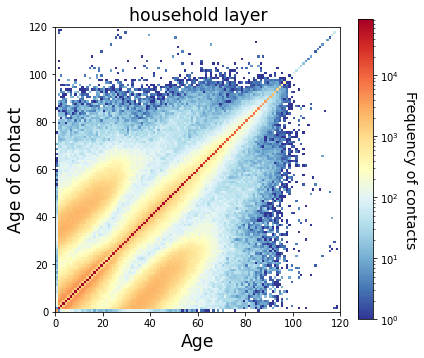

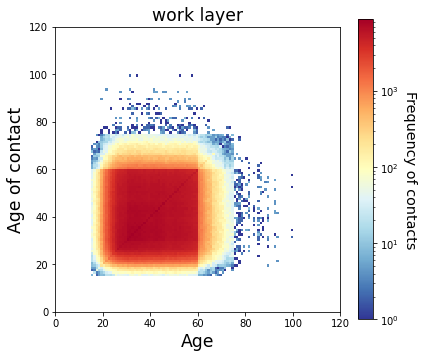

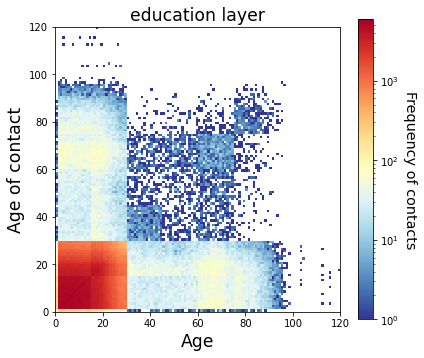

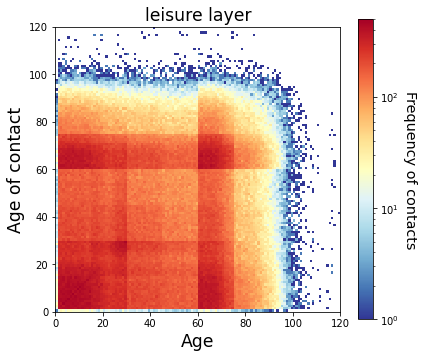

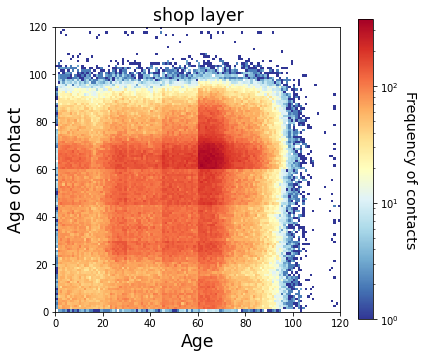

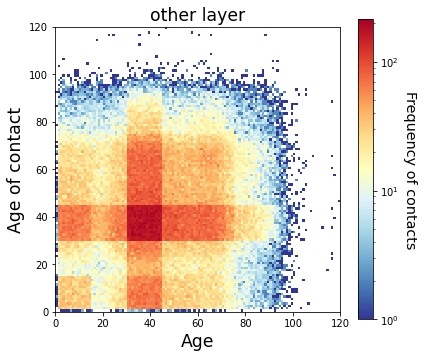

In [694]:
plot_results('household', graph_household)
plot_results('work', graph_work)
plot_results('education', graph_education)
plot_results('leisure', graph_leisure)
plot_results('shop', graph_shop)
plot_results('other', graph_other)

In [168]:
def print_stats(layer, graph, f=None):
    
    if f is None:
        avg_contacts=graph.get_total_degrees(graph.get_vertices()).mean()
        std_contacts=graph.get_total_degrees(graph.get_vertices()).std()
        print('Daily average number of contacts at {} layer {} +/- {}'.format(layer, np.round(avg_contacts,2), np.round(std_contacts,2)))
    else:
        avg_contacts=graph.get_total_degrees(f).mean()
        std_contacts=graph.get_total_degrees(f).std()
        print('Daily average number of contacts at {} layer {} +/- {}'.format(layer, np.round(avg_contacts,2), np.round(std_contacts,2)))
        


    
print_stats('household', graph_household)
print_stats('work', graph_work, f_work)
print_stats('education', graph_education, f_education)
print_stats('leisure', graph_leisure, f_leisure)
print_stats('shop', graph_shop, f_shop)
print_stats('other', graph_other, f_other)

Daily average number of contacts at household layer 2.11 +/- 1.62


NameError: name 'graph_work' is not defined

In [164]:
graph_overall=Graph(graph_household)
graph_overall.add_edge_list(graph_all.get_edges())

#graph_overall.add_edge_list(graph_work.get_edges())
#graph_overall.add_edge_list(graph_education.get_edges())
#graph_overall.add_edge_list(graph_leisure.get_edges())
#graph_overall.add_edge_list(graph_shop.get_edges())
#graph_overall.add_edge_list(graph_other.get_edges())

In [165]:
print('Number of vertices: {} / Number of edges: {}'.format(graph_overall.num_vertices(), graph_overall.num_edges()))
graph_overall.num_edges()/graph_overall.num_vertices()*2

Number of vertices: 3527402 / Number of edges: 21026960


11.922066155204313

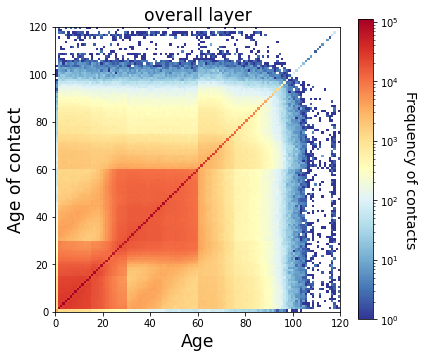

In [166]:
plot_results('overall', graph_overall)

In [169]:
f=graph_overall.vp['age'].a < 65
f=graph_overall.get_vertices()[f]


print_stats('overall', graph_overall, f)

Daily average number of contacts at overall layer 13.35 +/- 10.0


In [702]:
graph_overall.num_edges()*2/graph_overall.num_vertices()

5.964881235538224

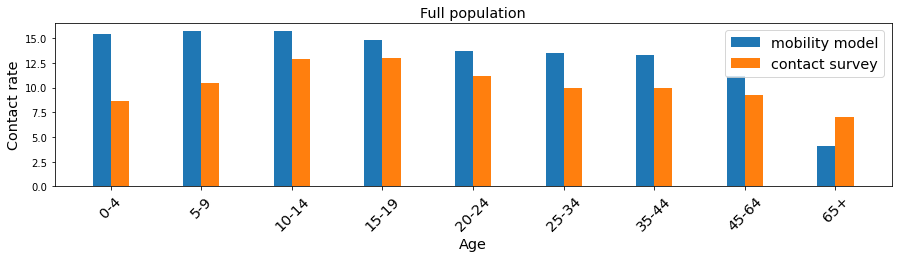

In [170]:
# get id's of persons conditioned on age

mnrc=[]

for u,v in zip([0, 5, 10, 15, 20, 25, 35, 45, 65], [5, 10, 15, 20, 25, 35, 45, 65, 120]):
    f=np.asarray((graph_overall.vp['age'].a>=u)&(graph_overall.vp['age'].a<v))
    f=graph_overall.get_vertices()[f]
    #print('{}-{} - {}'.format(u,v, 1*np.round(graph_overall.get_total_degrees(f).mean(), 2)))
    mnrc.append(np.round(graph_overall.get_total_degrees(f).mean(), 2))

size=2.
fig, ax=plt.subplots(figsize=(7.5*size,1.5*size))


n=0
data=np.array([8.64, 10.5, 12.92, 12.96, 11.14, 9.95, 9.93, 9.24, 7.01])
#data=data/data[n]

std=np.asarray(mnrc)
#std=std/std[n]


width=0.2
ax.bar(np.arange(len(mnrc))- width/2, std, width=width, label='mobility model')
ax.bar(np.arange(len(mnrc))+ width/2, data, width=width, label='contact survey')
ax.legend(fontsize='x-large', loc='best')
#ax.grid(True, lw=0.1)
#ax.set_yticks(np.arange(4)/2)
ax.set_xlabel('Age',fontsize='x-large')
ax.set_ylabel('Contact rate',fontsize='x-large')
ax.set_xticks(np.arange(9))
ax.set_xticklabels(['0-4', '5-9', '10-14', '15-19', '20-24', '25-34', '35-44', '45-64', '65+'], rotation=45, fontsize='x-large')
# ax.axhline(y=10., color='red', lw=0.1)
ax.set_title('Full population', fontsize='x-large')

fig.savefig('files/contacts_by_age.jpg', bbox_inches='tight', dpi=300)

plt.show()

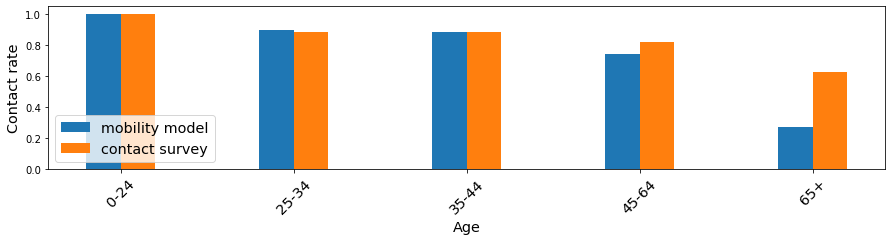

In [171]:
# get id's of persons conditioned on age

mnrc=[]

for u,v in zip([0, 25, 35, 45, 65], [25, 35, 45, 65, 120]):
    f=graph_overall.get_vertices()[(graph_overall.vp['age'].a>=u)&(graph_overall.vp['age'].a<v)]
    #print('{}-{} - {}'.format(u,v, 1*np.round(graph_overall.get_total_degrees(f).mean(), 2)))
    mnrc.append(np.round(graph_overall.get_total_degrees(f).mean(), 2))


size=2.
fig, ax=plt.subplots(figsize=(7.5*size,1.5*size))

app=8.64+ 10.5+ 12.92+ 12.96+ 11.14
app=app/5
data=np.array([app, 9.95, 9.93, 9.24, 7.01])
data=data/data[0]

std=np.asarray(mnrc)
std=std/std[0]


width=0.2
ax.bar(np.arange(len(mnrc))- width/2, std, width=width, label='mobility model')
ax.bar(np.arange(len(mnrc))+ width/2, data, width=width, label='contact survey')
ax.legend(fontsize='x-large', loc='lower left')
#ax.grid(True, lw=0.01)
#ax.set_yticks(np.arange(4)/2)
ax.set_xlabel('Age',fontsize='x-large')
ax.set_ylabel('Contact rate',fontsize='x-large')
ax.set_xticks(np.arange(5))
ax.set_xticklabels(['0-24', '25-34', '35-44', '45-64', '65+'], rotation=45, fontsize='x-large')

fig.savefig('files/contacts_by_age_aggregated.pdf', bbox_inches='tight')

plt.show()

In [172]:
number_of_persons_in_work=pd.read_csv('files/persons_in_work.csv')['person_id'].shape[0]
number_of_persons_in_education=pd.read_csv('files/persons_in_education.csv')['person_id'].shape[0]
number_of_persons_in_leisure=pd.read_csv('files/persons_in_leisure.csv')['person_id'].shape[0]
number_of_persons_in_shop=pd.read_csv('files/persons_in_shop.csv')['person_id'].shape[0]
number_of_persons_in_other=pd.read_csv('files/persons_in_other.csv')['person_id'].shape[0]

f_work=pd.read_csv('files/persons_in_work.csv')['person_id'].values
f_education=pd.read_csv('files/persons_in_education.csv')['person_id'].values
f_leisure=pd.read_csv('files/persons_in_leisure.csv')['person_id'].values
f_shop=pd.read_csv('files/persons_in_shop.csv')['person_id'].values
f_other=pd.read_csv('files/persons_in_other.csv')['person_id'].values

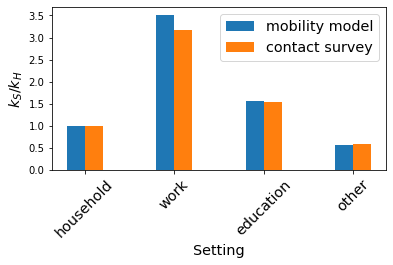

In [684]:
#from matplotlib import rc
#rc('text', usetex=False)


f_leisure_and_shop=np.unique(np.hstack((f_leisure, f_shop)))
mgh=graph_household.get_total_degrees(graph_household.get_vertices()).mean()

pp=[mgh/mgh,
    graph_work.get_total_degrees(f_work).mean()/mgh,
    graph_education.get_total_degrees(f_education).mean()/mgh,
    1/mgh*(graph_leisure.get_total_degrees(f_leisure_and_shop)+graph_shop.get_total_degrees(f_leisure_and_shop)).mean()]


pp=np.asarray(pp)
pp=pp/pp[0]
pp


pp_survey=[1, 3.17, 1.55, 0.59]

size=1.5
fig, ax=plt.subplots(figsize=(4*size,2*size))




width=0.2
ax.bar(np.arange(len(pp))- width/2, pp, width=width, label='mobility model')
ax.bar(np.arange(len(pp))+ width/2, pp_survey, width=width, label='contact survey')
ax.legend(fontsize='x-large', loc='best')
#ax.grid(True, lw=0.1)

#ax.set_xlabels(['household', 'work', 'education', 'other'])
#ax.get_xticks(np.arange(4), ['household', 'work', 'education', 'other'])

ax.set_xticks(np.arange(len(pp)))
ax.set_xticklabels(['household', 'work', 'education', 'other'], rotation=45, fontsize='x-large')
ax.set_xlabel('Setting',fontsize='x-large')
ax.set_ylabel(r'$k_S/k_H$',fontsize='x-large')

fig.savefig('files/contacts_by_setting.pdf', bbox_inches='tight')

plt.show()

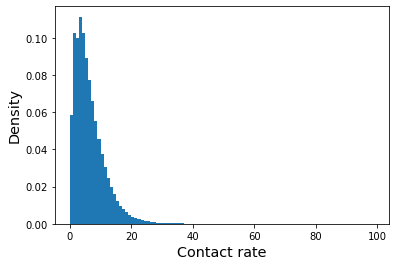

In [685]:
from scipy import stats

n=1
bins=np.arange(100/n)*n
plt.hist(graph_overall.get_total_degrees(graph_overall.get_vertices()), bins=bins, density=True)
# plt.grid(True, lw=0.1)
plt.xlabel('Contact rate', fontsize='x-large')
plt.ylabel('Density', fontsize='x-large')


plt.savefig('files/overall_distribution.pdf', bbox_inches='tight')

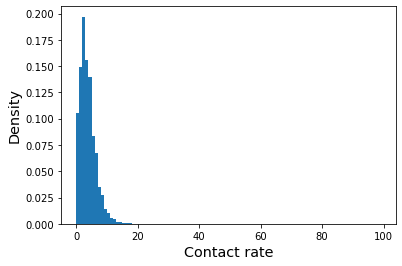

In [686]:
from scipy import stats

n=1
bins=np.arange(100/n)*n
plt.hist(graph_education.get_total_degrees(f_education), bins=bins, density=True)
# plt.grid(True, lw=0.1)
plt.xlabel('Contact rate', fontsize='x-large')
plt.ylabel('Density', fontsize='x-large')


plt.savefig('files/overall_distribution.pdf', bbox_inches='tight')

In [666]:
stats.mode(graph_overall.get_total_degrees(graph_overall.get_vertices()))

ModeResult(mode=array([3], dtype=uint64), count=array([392887]))

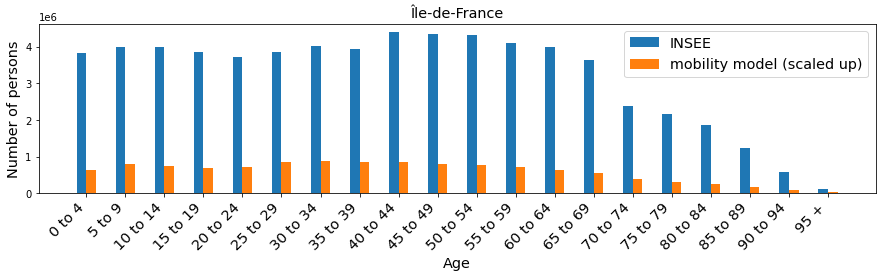

In [173]:
# Observed age distributions (INSEE)

year='2015'
df = pd.read_excel('data/estim-pop-nreg-sexe-aq-1975-2021.xlsx', sheet_name=year)

labels=df.iloc[3,1:21].values
counts=df.iloc[17,1:21].values # 17-FR, 11-IDF
dffp=pd.DataFrame({'age': labels, 'freq': counts})


# Estmated age mobility model (EQASIM)
df_persons=pd.read_csv('data/persons.csv',';')

pscale=30/100
k=5
bins=np.arange(95/k+1)*k
bins=np.hstack((bins, 999))
agg_mm_age, b=np.histogram(df_persons['age'].values, bins)


scale=1.25

#heights=[1., 3.17, 1.55, 1.86, 0.23]

width=0.25

fig, ax=plt.subplots(figsize=(3*4*scale,2.5*scale))
ax.bar(np.arange(dffp['age'].shape[0])-width/2, dffp['freq'].values, width=width,label='INSEE')
ax.bar(np.arange(dffp['age'].shape[0])+width/2, agg_mm_age*1/pscale, width=width,label='mobility model (scaled up)')

ax.set_ylabel('Number of persons', fontsize='x-large')
ax.set_xlabel('Age', fontsize='x-large')
#ax.set_title('Year '+year, fontsize='x-large')
ax.set_title('Île-de-France', fontsize='x-large')

ax.set_xticks(np.arange(len(dffp['age'].values)))


dffp['age']=dffp['age'].str.replace('à','to')
dffp['age']=dffp['age'].str.replace(' ans','')
dffp['age']=dffp['age'].str.replace('et plus','+')

ax.set_xticklabels(dffp['age'].str.replace('à','to'), fontsize='x-large')

#ax.set_xticks(dffp['age'].values)

for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')

ax.legend(fontsize='x-large')
# fig.savefig('outputs/dist_age_{}.pdf'.format('idf'), bbox_inches='tight')

fig.savefig('files/age_distribution.pdf', bbox_inches='tight')

plt.show()

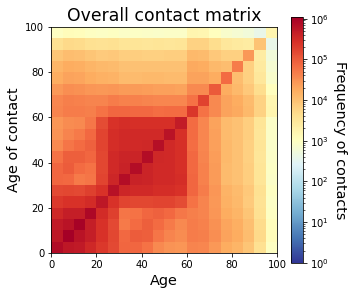

In [174]:
k=5
bins=np.arange(100/k+1)*k

cctc=get_contacts_fast(graph_overall)

cmap = mpl.cm.get_cmap('RdYlBu_r').copy()
cmap.set_bad(color='white', alpha=0.1)

size_window=5.
fig, ax=plt.subplots(figsize=(size_window,size_window), tight_layout=True)
pp=ax.hist2d(cctc[:,0],cctc[:,1],bins=bins, cmap=cmap, norm=mpl.colors.LogNorm(vmin=1))
    
ax.set_xlabel('Age', fontsize='x-large')
ax.set_ylabel('Age of contact', fontsize='x-large')
ax.set_aspect('equal')
ax.set_title('{}'.format('Overall contact matrix'), fontsize='xx-large')

cbar=fig.colorbar(pp[3], ax=ax, shrink=.75)
cbar.set_label('Frequency of contacts',fontsize='x-large',rotation=270, va='bottom')

#fig.savefig('outputs/ocontact_matrix_{}.pdf'.format('idf'), bbox_inches='tight')

overall_contact_matrix=pp[0].copy()

plt.show()

In [175]:
table=pd.read_csv('data/sheet1.csv',';')
labels=table.columns[1:].values


for k in labels:
    table[k]=table[k].str.replace(',','.').astype(float)

table=table.drop(['Index'], axis=1)
# table

In [176]:
def get_pop_matrix(k):
    
    m=k
    n=len(m)
    X=np.repeat(m.reshape(n,1), n, axis=1)
    X=X+X.T
    return X

# X[np.diag_indices_from(X)] = X[np.diag_indices_from(X)]/2

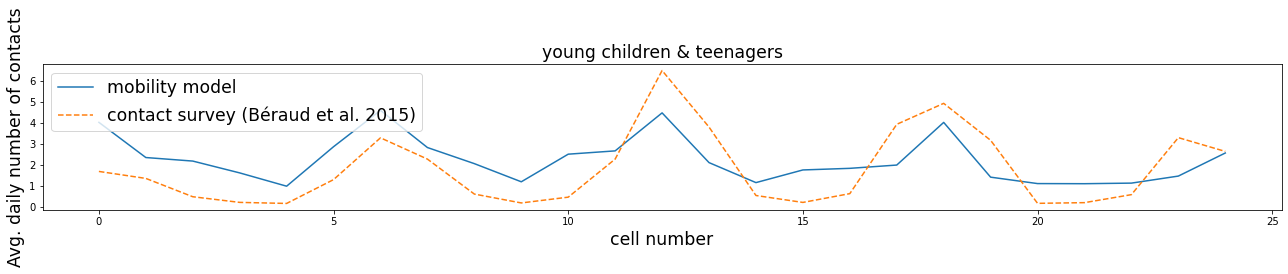

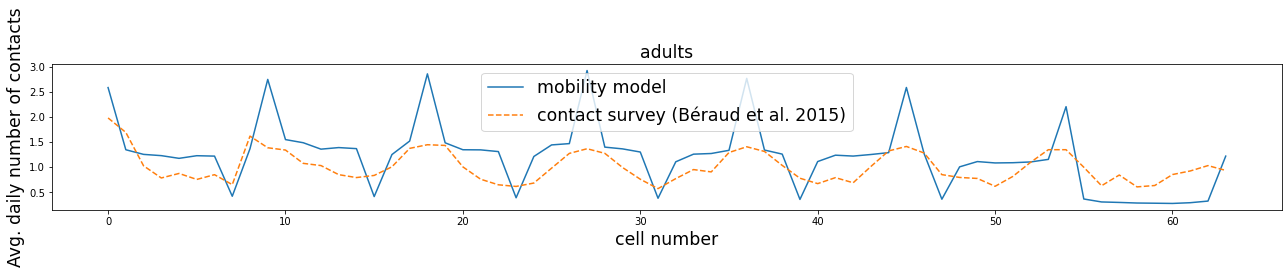

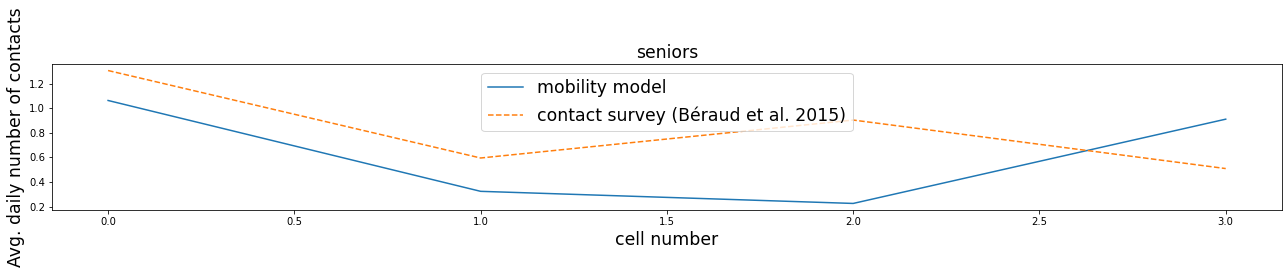

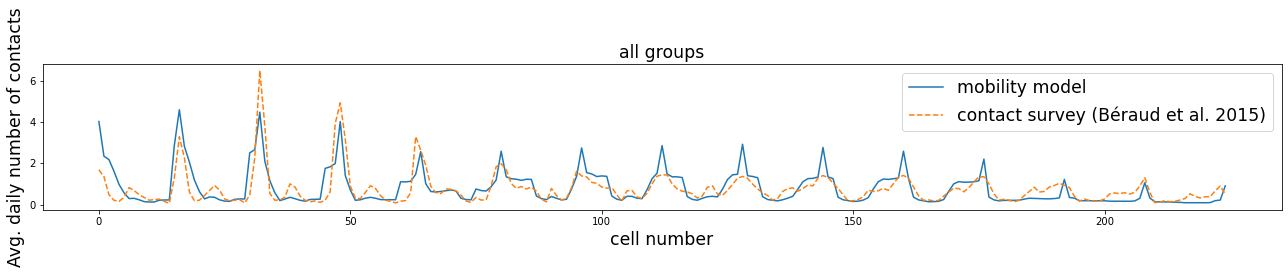

In [177]:
# mobility model
Z=overall_contact_matrix.copy()
ffx=np.where(agg_mm_age>0)

Z[:,ffx]=Z[:,ffx]/agg_mm_age[None,ffx]


#Z=Z/get_pop_matrix(agg_mm_age)

Z1=Z
Z1=Z1[0:15, 0:15]


# contact survey
survey_mat=table.values
survey_mat_nzd=survey_mat*dffp['freq'].values[None, 0:survey_mat.shape[0]] #[0:15][None,0:15]

#survey_mat_nzd=survey_mat*get_pop_matrix(dffp['freq'].values[0:15])
Z2=survey_mat_nzd.astype(float)


for lb, up, lbb in zip([0,5,13,0], [5,13,15,15], ['young children & teenagers','adults','seniors', 'all groups']):
    ##
    scale=1

    s=4.5
    fig, ax=plt.subplots(figsize=(4*s,.7*s), tight_layout=True)
    
    ax.plot(Z1[lb:up, lb:up].reshape(-1),'-',label='mobility model')
    ax.plot(Z2[lb:up, lb:up].reshape(-1), '--',label='contact survey (Béraud et al. 2015)')
    ax.legend(fontsize='xx-large', loc='best')
    # ax.grid(True, lw=0.1)
    ax.set_xlabel('cell number', fontsize='xx-large')
    ax.set_ylabel('Avg. daily number of contacts', fontsize='xx-large')
    ax.set_title(lbb, fontsize='xx-large')

    font = {'family': 'calibri',
            'color':  'k',
            'weight': 'normal',
            'size': 20,
            }
    #ax.text(80, 6, r'$\rho$ = 0.76 (p < 0.001)', fontdict=font)
    #fig.savefig('outputs/validation_{}.pdf'.format(lbb), bbox_inches='tight')

    fig.savefig('files/validation_{}.jpg'.format(lbb), bbox_inches='tight', dpi=300)
plt.show()

In [178]:
from scipy import stats
cc=np.round(stats.spearmanr(Z1.reshape(-1), Z2.reshape(-1))[0],2)
cc


0.73

Text(0, 0.5, 'contact survey')

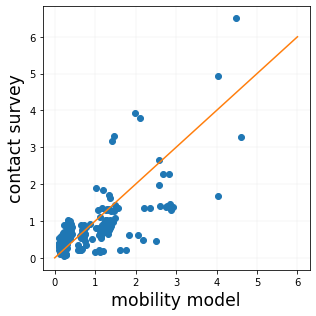

In [179]:
s=4.5
fig, ax=plt.subplots(figsize=(s,s), tight_layout=True)

lb=0
up=15
ax.plot(Z1[lb:up, lb:up].reshape(-1), Z2[lb:up, lb:up].reshape(-1), 'o',label='MM')
ax.plot([0,6], [0,6])

# ax.legend(fontsize='xx-large', loc='best')
ax.grid(True, lw=0.1)
ax.set_xlabel('mobility model', fontsize='xx-large')
ax.set_ylabel('contact survey', fontsize='xx-large')
# ax.set_title(lbb, fontsize='xx-large')

In [180]:
# bins=[0, 25, 65, 120]  # [0, 11, 19, 65, 120]

bins=[0, 11, 19, 65, 120]
A=get_contacts_fast(graph_overall)
contact_matrix=np.histogram2d(A[:,0], A[:,1], bins=bins)[0]

In [181]:
marginal=np.histogram(graph_overall.vp['age'].a, bins=bins)[0]

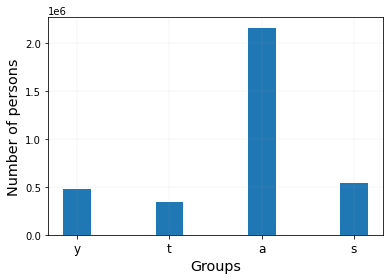

In [182]:
fig, ax=plt.subplots()
ax.bar(np.arange(len(marginal)), marginal, width=0.3)
ax.set_xticks(np.arange(4))
ax.set_xticklabels(['y','t','a','s'], fontsize='large')
ax.grid(True, lw=0.1)
ax.set_xlabel('Groups', fontsize='x-large')
ax.set_ylabel('Number of persons', fontsize='x-large')
plt.show()

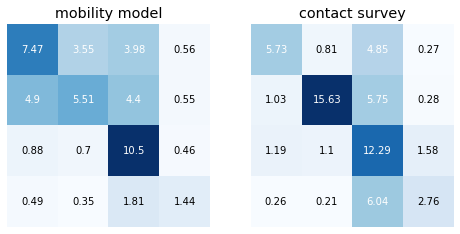

In [183]:
labels=['yc','t','a','s']

observed_matrix=np.array([[5.73, 0.81, 4.85, 0.27],
                          [1.03, 15.63, 5.75, 0.28],
                          [1.19, 1.10, 12.29, 1.58],
                          [0.26, 0.21, 6.04, 2.76]])

#estimated_matrix=pp2[0].copy()

#contact_matrix=np.histogram2d(A[:,0], A[:,1], bins=[0, 11, 19, 65, 120])[0]
estimated_matrix=contact_matrix.copy()
# estimated_matrix[np.diag_indices_from(estimated_matrix)] /= 2


#ffx=np.where(agg_mm_age_bm>0) # no zero anyway
estimated_matrix=estimated_matrix/marginal[None,:]
estimated_matrix=estimated_matrix.T

scale=2.
fig, (ax, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(4*scale,3*scale))
ax.imshow(estimated_matrix, cmap='Blues')
ax2.imshow(observed_matrix, cmap='Blues')

# We want to show all ticks...
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)


# We want to show all ticks...
ax2.set_xticks(np.arange(len(labels)))
ax2.set_yticks(np.arange(len(labels)))

# ... and label them with the respective list entries
ax2.set_xticklabels(labels)
ax2.set_yticklabels(labels)


# Loop over data dimensions and create text annotations.
for i in range(len(marginal)):
    for j in range(len(marginal)):
        if np.round(estimated_matrix[i, j],2)>2.:
            color='white'
        else:
            color='black'
            
        text = ax.text(j, i, np.round(estimated_matrix[i, j],2),
                       ha="center", va="center", color=color)
        
        
# Loop over data dimensions and create text annotations.
for i in range(4):
    for j in range(4):
        
        if np.round(observed_matrix[i, j],2)>3.:
            color='white'
        else:
            color='black'
        
        text = ax2.text(j, i, np.round(observed_matrix[i, j],2),
                       ha="center", va="center", color=color)
        
ax.axis('off')
ax2.axis('off')

ax.set_title('mobility model', fontsize='x-large')
ax2.set_title('contact survey', fontsize='x-large')

plt.show()

In [230]:
df_households=pd.read_csv('data/households.csv', ';')

In [232]:
df_households.shape

(1567757, 5)

In [237]:
graph_household.get_total_degrees(graph_household.get_vertices()).max()

21

In [263]:
x=graph_overall.get_total_degrees(graph_overall.get_vertices())

bins=[0, 1, 5, 10, 20, 50, 100]
p=np.histogram(x, bins=bins)
print(np.vstack((p[0],np.round(100*p[0]/p[0].sum(),2))).T[:,1])


[ 5.74 34.83 13.69 16.87 27.66  1.21]


In [257]:
unq, cnt= np.unique(x, return_counts=True)
unq

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169,
       170, 171, 174, 175, 176, 177, 178, 180, 181, 182, 185, 18

ok


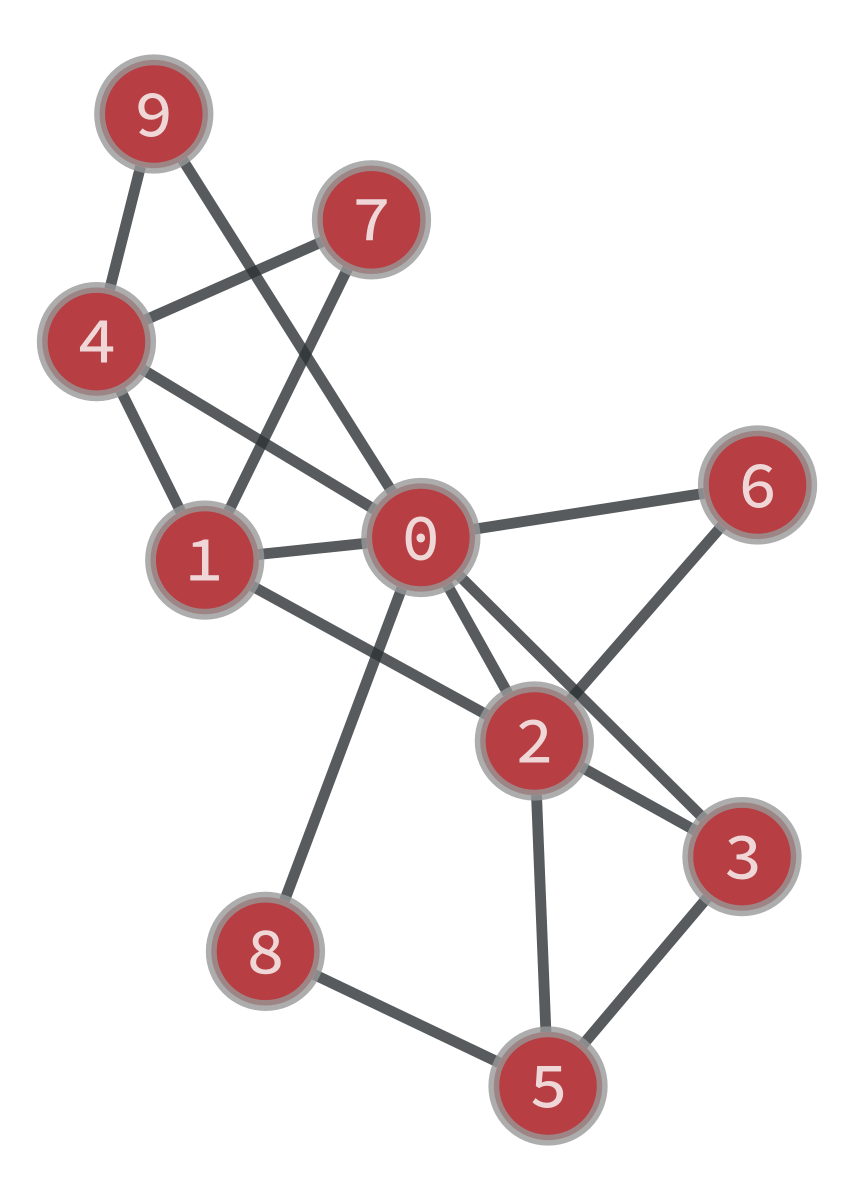

In [514]:
# BA model (non-directed)

g=price_network(10, m=2, directed=False)

print('ok')

graph_draw(g, vertex_text=g.vertex_index)
#state = minimize_nested_blockmodel_dl(g)
#draw_hierarchy(state)

g.get_total_degrees(g.get_vertices()).mean()

u,v =np.histogram(g.get_total_degrees(g.get_vertices()), bins=np.arange(10**3)+1)

#plt.loglog((v[0:-1]+v[1:])/2,u, 'o')
#plt.grid(True, lw=0.1)
#plt.show()

In [515]:
for e in bfs_iterator(g, g.vertex(0)):
    print(e.source(), "->", e.target())



0 -> 1
0 -> 2
0 -> 3
0 -> 4
0 -> 6
0 -> 8
0 -> 9
1 -> 7
2 -> 5


In [516]:
g.num_edges()

17

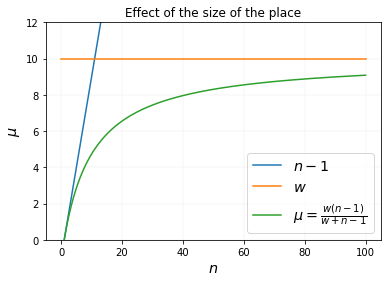

In [540]:
def f1(n, w):
    return n-1

def f2(n, w):
    return np.repeat(w, len(n))

def f3(n, w):
    return w*(n-1)/(w+n-1)

x=np.linspace(0, 100, 1000)

w=10.
plt.plot(x, f1(x, w), label=r'$n-1$')
plt.plot(x, f2(x, w), label=r'$w$')
plt.plot(x, f3(x, w), label=r'$\mu=\frac{w(n-1)}{w+n-1}$')
plt.grid(True, lw=0.1)
plt.ylim(0, 12)
plt.xlabel(r'$n$',fontsize='x-large')
plt.ylabel(r'$\mu$', fontsize='x-large')
plt.legend(loc='best', fontsize='x-large')
plt.title('Effect of the size of the place')
#plt.show()
plt.savefig('ep.pdf', bbox_inches='tight')

In [74]:
contact_survey=pd.read_excel('RawData_ComesF.xlsx')

In [75]:
contact_survey.head()

,Vague,numQ,contrôleQ,Type de questionnaire,Q1,Unnamed: 5,Q2,Q3,Q7_1,Q6,...,Unnamed: 1175,Unnamed: 1176,Unnamed: 1177,Unnamed: 1178,Unnamed: 1179,Unnamed: 1180,Unnamed: 1181,Unnamed: 1182,Unnamed: 1183,NBcontactTOT
0,NaN,NaN,NaN,NaN,Q3_1,NaN,Q2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,vague,num questio,CONTRÔLE Num Questio versus recrut Tel,NaN,Age du sujet de l'enquête,NaN,Sexe du sujet de l'enquête,Lien du répondant pour l'enfant <15 ans Sujet ...,Age du répondant pour l'enfant <15 ans Sujet d...,Sexe du répondant pour l'enfant <15 ans Sujet ...,...,lieux 86,lieux 87,lieux 88,lieux 89,lieux 90,lieux 91,freq,peau,durée,Nombre de contacts saisis JOUR 1 + JOUR 2
2,2,15218,1,1.0,38,NaN,2,NaN,NaN,NaN,...,0,0,0,0,0,0,NaN,NaN,NaN,3
3,2,3996,1,0.0,0,NaN,2,1,29,1,...,0,0,0,0,0,0,NaN,NaN,NaN,10
4,2,14409,1,1.0,18,NaN,2,NaN,NaN,NaN,...,0,0,0,0,0,0,NaN,NaN,NaN,21


In [76]:
age_of_participant=contact_survey.iloc[2:,4].values

In [77]:
age_of_contact=contact_survey.iloc[2:,11:21].values

In [582]:
age_of_contact.shape

(2033, 10)

In [583]:
age_contact_matrix=np.zeros((120, 120))

for u, v in zip(age_of_participant, age_of_contact):
    #print(u, v)
    
    for j in v:
        if not np.isnan(j):
            age_contact_matrix[j,u]+=1
            age_contact_matrix[u,j]+=1



<ipython-input-584-9e0c3f016ad9>:1: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(age_contact_matrix), origin='lower', cmap='RdYlBu', vmin=0)


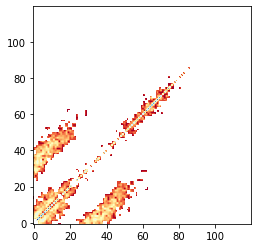

In [584]:
plt.imshow(np.log(age_contact_matrix), origin='lower', cmap='RdYlBu', vmin=0)

In [599]:
nb_of_contacts=0

size_of_household=contact_survey.iloc[2:,10].values

for k in size_of_household:
    if k>1:
        nb_of_contacts+=(k-1)*k/2
        
print('{} daily contacts in average in household layer'.format(np.round(nb_of_contacts*2/size_of_household.sum() ,2)))

2.56 daily contacts in average in household layer


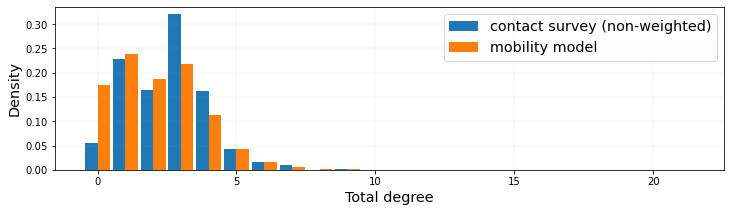

In [643]:
contacts=[]

for k in size_of_household:
    if k==1:
        contacts.append(0)
    elif k>1:
        for l in range(k):
            contacts.append(k-1)
    else:
        print('error !')
        
contacts=np.asarray(contacts)

x, y=np.unique(contacts, return_counts=True)

w=0.45



s=3.
fig, ax=plt.subplots(figsize=(4*s, 1.*s))
ax.bar(x-w/2, y/y.sum(), w, label='contact survey (non-weighted)')
#ax.plot(x, y/y.sum())

f=graph_household.get_vertices()

x, y=np.unique(graph_household.get_total_degrees(f), return_counts=True)
ax.bar(x+w/2, y/y.sum(), w, label='mobility model')
#ax.plot(x, y/y.sum())
ax.grid(True, lw=0.1)
ax.legend(fontsize='x-large')

ax.set_xlabel('Total degree', fontsize='x-large')
ax.set_ylabel('Density', fontsize='x-large')

plt.show()

In [644]:
print('survey: {} / model: {}'.format(np.round(contacts.mean(), 2), 
                       np.round(np.mean(graph_household.get_total_degrees(f)), 2)))


print('survey: {} / model: {}'.format(np.round(contacts.std(), 2), 
                       np.round(np.std(graph_household.get_total_degrees(f)), 2)))

survey: 2.56 / model: 2.11
survey: 1.44 / model: 1.62


In [90]:
df_persons.shape

(3527402, 10)

0.14042408367256673


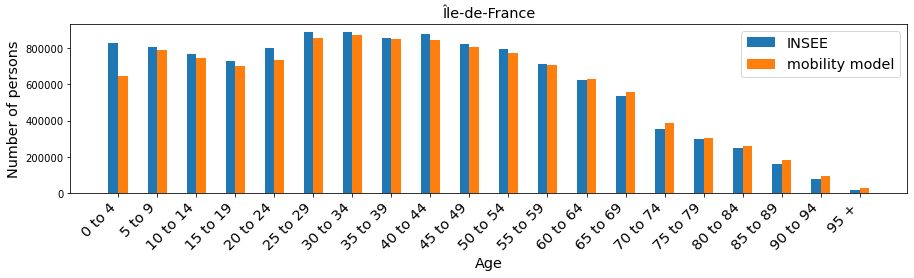

In [96]:
# Survey



# Observed age distributions (INSEE)

year='2015'
df = pd.read_excel('data/estim-pop-nreg-sexe-aq-1975-2021.xlsx', sheet_name=year)

labels=df.iloc[3,1:21].values
counts=df.iloc[11,1:21].values # 17-FR, 11-IDF
dffp=pd.DataFrame({'age': labels, 'freq': counts})


# Estmated age mobility model (EQASIM)
#df_persons=pd.read_csv('data/persons.csv',';')

pscale=30/100
k=5
bins=np.arange(95/k+1)*k
bins=np.hstack((bins, 999))
agg_mm_age, b=np.histogram(df_persons['age'].values, bins)


psscale=1/1000
k=5
bins=np.arange(95/k+1)*k
bins=np.hstack((bins, 999))
agg_mm_age_survey, b=np.histogram(age_of_participant, bins)


scale=1.25

#heights=[1., 3.17, 1.55, 1.86, 0.23]

width=0.25

fig, ax=plt.subplots(figsize=(3*4*scale,2.5*scale))
ax.bar(np.arange(dffp['age'].shape[0])-width/2, dffp['freq'].values, width=width,label='INSEE')
ax.bar(np.arange(dffp['age'].shape[0])+width/2, agg_mm_age, width=width,label='mobility model')


#ax.bar(np.arange(agg_mm_age.shape[0])-width/2, agg_mm_age/agg_mm_age[0], width=width,label='contact survey')


ax.set_ylabel('Number of persons', fontsize='x-large')
ax.set_xlabel('Age', fontsize='x-large')
#ax.set_title('Year '+year, fontsize='x-large')
ax.set_title('Île-de-France', fontsize='x-large')

ax.set_xticks(np.arange(len(dffp['age'].values)))


dffp['age']=dffp['age'].str.replace('à','to')
dffp['age']=dffp['age'].str.replace(' ans','')
dffp['age']=dffp['age'].str.replace('et plus','+')

ax.set_xticklabels(dffp['age'].str.replace('à','to'), fontsize='x-large')

#ax.set_xticks(dffp['age'].values)

for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_ha('right')

ax.legend(fontsize='x-large')
# fig.savefig('outputs/dist_age_{}.pdf'.format('idf'), bbox_inches='tight')

fig.savefig('files/age_distribution.jpg', dpi=400, bbox_inches='tight')


print((dffp['freq'].values/dffp['freq'].values.sum())[13:].sum())
plt.show()

In [85]:
(dffp['freq'].values/dffp['freq'].values.sum())[13:]

array([0.0564673816528719, 0.03716943209791987, 0.03378009745785361,
       0.028997468010556193, 0.019033162889164356, 0.009190535840903182,
       0.0018092459503744128], dtype=object)

In [11]:
fp=pd.read_csv('files/tracker_size_all.csv')
fp['counts'].max()

2515

In [24]:
nb_of_contacts=0

for e in complete_graph(fp['counts'].max()).get_edges():
    nb_of_contacts+=1
    
print(nb_of_contacts)

3161355


In [93]:
df_persons.shape

(11758464, 11)

In [1]:
## NEW MODEL

import pandas as pd

df_persons=pd.read_csv('data/all/persons.csv',';')
df_persons['person_id_gt']=df_persons.index
        
df_activities=pd.read_csv('data/all/full_activities_with_ids.csv').drop(['Unnamed: 0'], axis=1).rename(columns={'uid':'location_id'})
df_activities=df_activities[df_activities['purpose']!='home']
df_activities=df_activities[(~df_activities.start_time.isnull())&(~df_activities.end_time.isnull())]
df_activities['purpose']=df_activities['purpose'].astype('category').cat.reorder_categories(['work', 'education', 'leisure', 'shop', 'other']).cat.codes
df_activities=df_activities.merge(df_persons[['person_id_gt', 'person_id']], on='person_id') 

In [2]:
df_activities.head(5)

,person_id,household_id,activity_index,preceding_trip_index,following_trip_index,purpose,start_time,end_time,is_first,is_last,location_id,person_id_gt
0,1,1,1,0,1,2,52889.0,61889.0,False,False,1,2558
1,124800,66444,1,0,1,2,64310.0,65210.0,False,False,1,5285382
2,124800,66444,2,1,2,2,67010.0,67070.0,False,False,5552,5285382
3,144857,77128,3,2,3,2,47207.0,64487.0,False,False,1,11495954
4,144857,77128,1,0,1,3,36287.0,40487.0,False,False,11051,11495954


In [3]:
df_persons.shape

(11758464, 11)

In [4]:
from numba import jit
from numba.types import int64
from numba import njit, prange
from numba import jit, njit
from numba.types import float64, int64
from numba import njit, prange

from graph_tool.all import *
import numpy as np

def sample_d(ws=15., n=10):
    mean=ws*(n-1)/(ws+n-1)
    
    #std=np.sqrt(0.35)
    #variance=std**2
    

    #scale=variance/mean
    #shape=mean/scale
    
    #avg=np.random.gamma(shape=shape, scale=scale, size=1)[0]
    avg=mean
    return np.random.poisson(avg, 1)[0]
    #return np.random.poisson(mean, 1)[0]
    
def detect_contact(id_ex, tl_ex, ws=41.8):

    id_ex_dict=dict([(i,j) for i,j in zip(np.arange(len(id_ex)),id_ex)])
    
    n=len(id_ex)
    iterator=random_graph(n, lambda: sample_d(ws, n), directed=False).get_edges() # random graph / can be seen as the in-place spatial constraint
       
    llpp=[]
    llpp.extend(full(iterator, tl_ex, id_ex))

    return llpp

@njit
def merge_timelines(timelines, ids):
    unq=np.unique(ids)
    new_timelines=np.zeros((len(unq),timelines.shape[1]))

    for i,k in zip(np.arange(len(unq)),unq):
        f=np.where(ids==k)[0]
        new_timelines[i,:]=(timelines[f,:].sum(axis=0)>0).astype(np.int8)
        
    return new_timelines

@jit(float64[:](float64[:], int64, float64[:]),nopython=True)
def rnd1(x, decimals, out):
    return np.round_(x, decimals, out)

@jit(nopython=True)
def compute_timelines_2(np_array):
    
    N=np_array.shape[0]

    resolution=2
    #mins=60
    secs=60
    #nb=int(24*60/resolution) # 5 mins - activities lower than 5 mins are not captured !
    timeline=np.arange(24*60/resolution+1)*2
    time_intervals=np.zeros((N,len(timeline))) # loc, id, timeline
    
    # time_intervals[:,-2]=np_array[:,0] # person ID
    # time_intervals[:,-1]=np_array[:,1] # loc ID
    
    for k in np.arange(N):
        h=np_array[k,2:4]
        h_adj=h/secs # switch to minutes
        h_adj=h_adj/resolution
        h_adj=rnd1(h_adj, 0, np.empty_like(h_adj))
        h_adj=h_adj.astype(np.int64)
        lb, hb=h_adj[0], h_adj[1]
        #print('ID', k, 'has lb ', lb, ' and hb', hb)
        
        #if hb>timeline.shape[0]-1:
        #    hb=timeline.shape[0]-1
        #else:   
        
        time_intervals[k,lb:hb]=1

    return time_intervals

def filter_by_location(np_array):
    
    # Sort input array test w.r.t. first column that are IDs
    test_sorted = np_array[np_array[:,1].argsort()]

    # Convert the string IDs to numeric IDs
    locations = np.unique(test_sorted[:,1], return_inverse=False)
    # print('shape of numeric_ID {}'.format(numeric_ID.shape))

    # Get the indices where shifts (IDs change) occur
    _,cut_idx = np.unique(test_sorted[:,1],return_index=True)

    # Use the indices to split the input array into sub-arrays with common IDs
    return np.split(test_sorted,cut_idx)[1:]

@jit(nopython=True, parallel=False)
def full(links, timelines, d):
    
    # build dictionary
    dc=dict()
    for k, l in zip(range(len(d)), d):
        dc[k]=l
    
    llp=[]
    for m in range(len(links)):
        
        #llp.clear()
        C=timelines[links[m][0], :]*timelines[links[m][1], :]
        op=np.sum(C)
        u=links[m]
        
        # print('--')
        # print(C)
        # print('--')
        
        ks=np.array_split(C, np.where(C==0)[0])
        
        for k in prange(len(ks)):
            d=np.sum(ks[k])
            if d>0:
                llp.append((dc[u[0]],dc[u[1]],d))
                
    return llp
    

@jit(nopython=True, parallel=True)
def loop_over_links(links, timelines, d):
    
    # build dictionary
    dc=dict()
    for k, l in zip(range(len(d)), d):
        dc[k]=l
    
    llpp=[]
    for k in prange(len(links)):
        llpp.extend([(dc[i[0]], dc[i[1]]) for i in find_joint_activities(timelines[links[k][0], :], timelines[links[k][1], :], links[k])])
    
    
    return llpp
        
@jit(nopython=True)
def find_joint_activities(A,B,u):
    llp=[]
    C=A*B
    op=np.sum(C)
    for k in np.array_split(C, np.where(C==0)[0]):
        d=np.sum(k)
        if d>0:
            llp.append((u[0],u[1],d))
    
    return llp

@jit(nopython=True)
def nump2_jitted(n, k):

    a= np.ones((k, n-k+1))
    a= a.astype(np.int64)
    a[0] = np.arange(n-k+1)

    for j in range(1, k):
        reps = (n-k+j) - a[j-1]
        a_s=np.zeros((a.shape[0],np.sum(reps)))
        a_s=a_s.astype(np.int64)
        
        for i in range(len(reps)):
            a_s[:,np.sum(reps[0:i]):np.sum(reps[0:(i+1)])]=np.repeat(a[:,i],reps[i]).reshape((-1, reps[i]))
            
        a=a_s
        ind=np.cumsum(reps)
        for u,v in zip(ind[:-1],1-reps[1:]):
            a[j, u] = v
            
        a[j,0]=j
        a[j]=np.cumsum(a[j])
    return a.T

def sample_k(max):
    accept = False
    while not accept:
        k = np.random.randint(1,max+1)
        accept = np.random.random() < 1.0/k
    return k



@njit
def get_contact_per_location(test_case, purpose=None):
    
    refs=np.array([[0,  5,  6,  8,  11],
                   [5,  1,  7,  9,  12],
                   [6,  7,  2, 10,  13],
                   [8,  9, 10,  3,  14],
                   [11,12, 13, 14,   4]])


    edge_list=[]
    act=5
    w=1/100
    #threshold=np.exp(w*(2-test_case.shape[0]))
    
    if purpose==None:
        for i in range(test_case.shape[0]-1):
            row=test_case[i]


            rem=test_case[(i+1):]
            for k in rem:
                if k[0]!=row[0]:
                    if row[-1]<=k[1]:
                        break
                    elif row[-1]<k[-1]:
                        d=row[-1]-k[1]
                        edge_list.append((row[0], k[0], d, act))
                    else:
                        d=k[2]-k[1]
                        edge_list.append((row[0], k[0], d, act))
    
    
    else:
        
        for i in range(test_case.shape[0]-1):
            row=test_case[i]
            pu=purpose[i] # origin
            avg=np.array([0.04008045, 0.06735285, 0.04726898, 0.05328411, 0.4585973 ])

            rem=test_case[(i+1):]
            for k, pv in zip(rem, purpose[(i+1):]):
                
                if pu==pv:
                    act=pu
                else:
                    act=refs[pu, pv]
                    
                if act==0:
                    threshold=0.04008045
                    
                elif act==1:
                    threshold=0.06735285
                    
                elif act==2:
                    threshold=0.04726898
                    
                elif act==3:
                    threshold=0.05328411
                    
                elif act==4:
                    threshold=0.4585973
                    
                else:
                    threshold=(avg[pu]+avg[pv])/2
                    
                    
                if k[0]!=row[0]:
                    if row[-1]<=k[1]:
                        break
                    elif row[-1]<k[-1]:
                        d=row[-1]-k[1]
                        
                        if np.random.uniform(0,1,1)[0]<=threshold:
                            edge_list.append((row[0], k[0], d, act))
                    else:
                        d=k[2]-k[1]
                        if np.random.uniform(0,1,1)[0]<=threshold:
                            edge_list.append((row[0], k[0], d, act))

    return edge_list

In [5]:
@njit
def get_contact_per_location(test_case, purpose=None, locsize=10):
    
    # ID - LOCATION - START TIME - END TIME / PURPOSE
    
    edge_list=[]
    #threshold=.012550110735619152
    w=6.95002417897531
    threshold=w/(w+locsize-1)
    #threshold=0.012550110735619152
    act=np.array([[0,  5,  6,  8,  11],
                   [5,  1,  7,  9,  12],
                   [6,  7,  2, 10,  13],
                   [8,  9, 10,  3,  14],
                   [11,12, 13, 14,   4]])
        
    for i in range(test_case.shape[0]-1): # loop through the activty-travel diaries
        row=test_case[i]
        pu=purpose[i] # origin
        
        rem=test_case[(i+1):]
        
        for k, pv in zip(rem, purpose[(i+1):]):  
            if k[0]!=row[0]: # if individuals are different
                
                if row[-1]<=k[2]: # no intersection
                    break
                
                if np.random.uniform(0,1,1)[0]<=threshold:
                    
                    if row[-1]<k[-1]:
                        d=row[-1]-k[2]
                        edge_list.append((row[0], k[0], d, act[pu, pv], row[1]))
                    else:
                        d=k[-1]-k[2]
                        edge_list.append((row[0], k[0], d, act[pu, pv], row[1]))

    return edge_list

In [6]:
@njit
def get_total_number_of_pcontacts(test_case, purpose=None):
    
    # ID - LOCATION - START TIME - END TIME / PURPOSE
    
    number_of_edges=0
        
    for i in range(test_case.shape[0]-1): # loop through the activty-travel diaries
        row=test_case[i]
        rem=test_case[(i+1):]
        for k, pv in zip(rem, purpose[(i+1):]):  
            if k[0]!=row[0]: 
                if row[-1]<=k[2]: 
                    break
                else:
                    number_of_edges+=1

    return number_of_edges

In [7]:
# get_contact_per_location(np_array[0:5], np.array([0, 2, 2, 0, 1]))

In [8]:
# contacts_per_individual=np.zeros((df_persons.shape[0], ))
mapping=df_persons[['person_id','person_id_gt']].set_index('person_id').to_dict()['person_id_gt']

np_array=df_activities[['person_id_gt','location_id','start_time','end_time','purpose']].astype(int).values

out=filter_by_location(np_array)

In [9]:
# NEW FEATURE
# This function helps me to check which agent is involved in a layer, and the number of occurences. This will be useful to compute the expected value of contacts by layer


@njit
def get_status(n, out):
    status_layer=np.zeros((n, 5))
    for k in out:
        for l in k:
            status_layer[l[0],l[-1]]+=1
    return status_layer 

In [12]:
status_layer=get_status(df_persons.shape[0], out)

/usr/lib/python3.9/site-packages/numba/core/ir_utils.py:2139: NumbaPendingDeprecationWarning: 
Encountered the use of a type that is scheduled for deprecation: type 'reflected list' found for argument 'out' of function 'get_status'.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-reflection-for-list-and-set-types

File "<ipython-input-9-731111b55027>", line 6:
@njit
def get_status(n, out):
^

  warnings.warn(NumbaPendingDeprecationWarning(msg, loc=loc))


In [10]:
out[0]

array([[    2558,        1,    52889,    61889,        2],
       [ 8583327,        1,    70542,    70542,        2],
       [ 6292739,        1,    46014,    48474,        2],
       [11199688,        1,    37020,    39720,        4],
       [10687345,        1,    46237,    59737,        2],
       [ 3121309,        1,    70117,    87217,        2],
       [ 7428718,        1,    36334,    36334,        2],
       [ 7756287,        1,    29207,    29507,        2],
       [ 1076311,        1,    31694,    31754,        4],
       [11637573,        1,    58462,    65062,        2],
       [11661786,        1,    43701,    49701,        2],
       [ 3273169,        1,    59057,    59057,        2],
       [ 4303312,        1,    54828,    57828,        2],
       [ 1141811,        1,    41136,    62736,        4],
       [ 1161940,        1,    44285,    47885,        2],
       [ 2373184,        1,    31954,    34654,        2],
       [11385980,        1,    43972,    49972,        2

In [13]:
number_of_agents_by_layer=np.count_nonzero(status_layer, axis=0)
number_of_agents_by_layer

array([3902777, 2373657, 3322051, 3446186, 2524343])

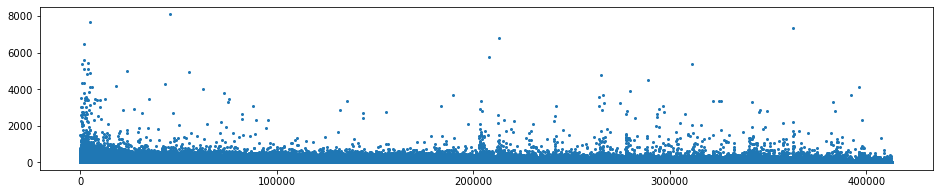

In [14]:
import matplotlib.pyplot as plt

a,b=np.unique([np.unique(group[:,0]).shape[0] for group in out], return_counts=True)


fig, ax=plt.subplots(figsize=(16,3))
# ax.plot(a, b, 'o', ms=2.)
ax.plot([np.unique(group[:,0]).shape[0] for group in out], 'o', ms=2.)
plt.show()


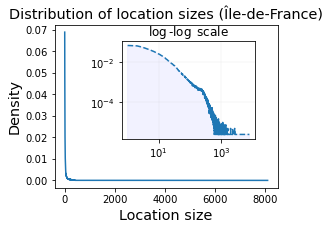

In [15]:
u, c=np.unique([np.unique(group[:,0]).shape[0] for group in out], return_counts=True)

fig, ax=plt.subplots(figsize=(4,3))
ax.plot(u,c/c.sum())
ax.set_xlabel('Location size', fontsize='x-large')
ax.set_ylabel('Density', fontsize='x-large')
#ax.grid(True, lw=0.1)
ax.set_title('Distribution of location sizes (Île-de-France)', fontsize='x-large')


#ax.set_xticks(u)
#ax.set_xticklabels(u,fontsize='x-large')

# inset axes....
axins = ax.inset_axes([0.3, 0.3, 0.6, 0.6])
axins.loglog(u,c/c.sum(),'--')
axins.grid(True, lw=0.1)
#ax.set_xlabel('Location size', fontsize='x-large')
#ax.set_ylabel('Density', fontsize='x-large')
axins.set_title(r'$\log$-$\log$ scale')

axins.fill_between(u, c/c.sum(), 0,
                 facecolor="orange", # The fill color
                 color='blue',       # The outline color
                 alpha=0.1/2)          # Transparency of the fill


# sub region of the original image
#x1, x2, y1, y2 = -1.5, -0.9, -2.5, -1.9
#axins.set_xlim(x1, x2)
#axins.set_ylim(y1, y2)
#axins.set_xticklabels([])
#axins.set_yticklabels([])
#ax.indicate_inset_zoom(axins, edgecolor="black")
#fig.savefig('dls.pdf', bbox_inches='tight')

#fig.savefig('dls.jpg', bbox_inches='tight', dpi=400)
plt.show()

In [16]:
import time
from tqdm import tqdm
list_of_group_contacts=[] # To store the amount of contacts generated after filtering per space/time at location ID k
list_of_contacts=[]

sttm=time.time()

loop_over=out

with tqdm(total=len(loop_over), position=0, leave=True) as pbar: 
    for k in loop_over:
        if k.shape[0]>1:
            k_sorted=k[k[:, 2].argsort()]
            fo=get_contact_per_location(k_sorted[:,0:-1],k_sorted[:,-1], len(np.unique(k_sorted[:,0])))
            list_of_group_contacts.append((k[0,1], len(fo)))
            list_of_contacts.extend(fo)
        pbar.update(1)
        
print(time.time()-sttm)

100%|██████████| 413072/413072 [05:44<00:00, 1199.96it/s]

344.2442982196808


In [99]:
list_of_group_contacts # list of locationID, + amount of contacts with spatiotemporal filtering 
list_locationID_locationSize=[(group[0,1], np.unique(group[:,0]).shape[0]) for group in out]

In [18]:
df1b=pd.DataFrame(list_of_group_contacts, columns=['id','nb_of_contacts'])
df1b.head()

df2b=pd.DataFrame(list_locationID_locationSize, columns=['id','group_size'])
df2b.head()

df3b=pd.merge(df1b, df2b, on='id').fillna(0)
df3b.head()

,id,nb_of_contacts,group_size
0,1,14,26
1,2,16,28
2,3,184,251
3,4,471,92
4,5,1901,431


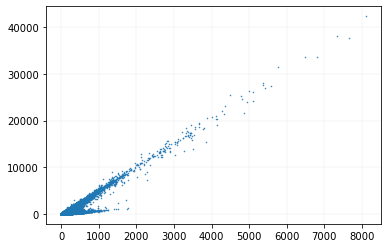

In [23]:
#plt.plot(df3['group_size'], df3['nb_of_contacts'],'o')
plt.plot(df3b['group_size'], df3b['nb_of_contacts'],'o',ms=1/2)
plt.grid(True, lw=0.1)

In [24]:
len(list_of_contacts)

34631630

In [97]:
def f(w, df):
    #w=2
    st=0
    p=0.012550110735619152
    for n, E in zip(df['group_size'].values, df['nb_of_contacts'].values):
        st=st+E*w/(w+n-1)
    return st-df['nb_of_contacts'].sum()*p

# f(w, df3)

from scipy import optimize
optimize.root_scalar(f, args=df3, bracket=[1/10**2, 10], method='brentq')

      converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 6.95002417897531

In [84]:
f(100000, df3.head(20))

8085.524565368985

In [29]:
# compute total potential number of edges

total_number_of_contacts=0

sttm=time.time()

loop_over=out

with tqdm(total=len(loop_over), position=0, leave=True) as pbar: 
    for k in loop_over:
        if k.shape[0]>1:
            k_sorted=k[k[:, 2].argsort()]
            #list_of_contacts.extend(get_contact_per_location(k_sorted[:,0:-1],k_sorted[:,-1]))
            total_number_of_contacts=total_number_of_contacts+get_total_number_of_pcontacts(k_sorted[:,0:-1],k_sorted[:,-1])
        pbar.update(1)
        
print(time.time()-sttm)

100%|██████████| 413072/413072 [00:46<00:00, 8825.13it/s] 

46.809345722198486


In [33]:
total_number_of_contacts

NameError: name 'total_number_of_contacts' is not defined

In [34]:
popsize=11758464
mu=8

In [35]:
p=(mu*popsize-graph_household.num_edges()*2)/(total_number_of_contacts*2)
p

len(list_of_contacts)*2/popsize

NameError: name 'total_number_of_contacts' is not defined

In [17]:
# Here I build my contact network based on the list received previosuly

#print('\n\n\n\n\n\n')
print('Creating an undirected contact network of size ', df_persons.shape[0], ' nodes ...')

start_time=time.time()

setting_temporal_network=Graph(directed=False)
setting_temporal_network.add_vertex(df_persons.shape[0])
setting_temporal_network.vp['age'] = setting_temporal_network.new_vp('int', vals=df_persons.age.values.astype(int), val=None)

ppid = setting_temporal_network.new_ep('int')
purpose = setting_temporal_network.new_ep('int')
#ppis = setting_temporal_network.new_ep('int')

setting_temporal_network.edge_properties['p'] = ppid
setting_temporal_network.edge_properties['purpose'] = purpose

#setting_temporal_network.edge_properties['n'] = ppis

print('Adding links ...')
setting_temporal_network.add_edge_list(list_of_contacts, eprops=[ppid, purpose])

print('contact network has {} egdes and {} vertices'.format(setting_temporal_network.num_edges(), setting_temporal_network.num_vertices()))
print('Setting-based contact network estimated in ',time.time()-start_time, ' secs !')

Creating an undirected contact network of size  11758464  nodes ...
Adding links ...
contact network has 34633928 egdes and 11758464 vertices
Setting-based contact network estimated in  70.92443132400513  secs !


In [19]:
setting_temporal_network.save("files/graph_weekday_complete.xml.gz")

In [18]:
# Add household-based contacts !

graph_household=load_graph('files/graph_weekday_household_all.xml.gz')
graph_household.ep['p'] = graph_household.new_ep('int', vals=None, val=0)
graph_household.ep['purpose'] = graph_household.new_ep('int', vals=None, val=25)
#setting_temporal_network.add_edge_list(graph_household.get_edges())

print('okok')
setting_temporal_network.add_edge_list(graph_household.get_edges(eprops=[graph_household.ep['p'], graph_household.ep['purpose']]))

print('graph loaded !')
print('graph estimation completed !')

okok
graph loaded !
graph estimation completed !


In [ ]:
# graph_overall=Graph(setting_temporal_network)
# graph_overall.add_edge_list(graph_household.get_edges())

In [23]:
graph_household.vp

{'age': <VertexPropertyMap object with value type 'int32_t', for Graph 0x7f3ea9ae3070, at 0x7f3ee1ef37f0>}

In [24]:
setting_temporal_network.vp

{'age': <VertexPropertyMap object with value type 'int32_t', for Graph 0x7f3ea9ae3a60, at 0x7f3ea9ae3b20>}

In [21]:
(setting_temporal_network.num_edges()*2+graph_household.num_edges()*2)/setting_temporal_network.num_vertices()

7.997437930668496

In [26]:
setting_temporal_network.num_vertices()

11758464

In [80]:
setting_temporal_network.num_edges()+graph_household.num_edges()

47029073

In [24]:
# graph_overall.num_edges()*2/graph_overall.num_vertices()

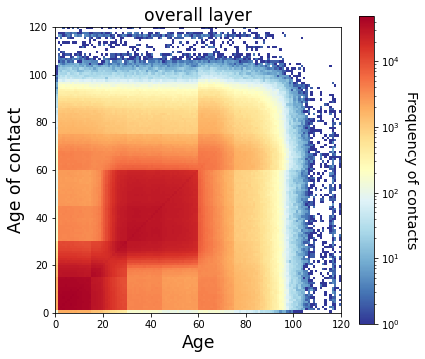

In [121]:
plot_results('overall', setting_temporal_network)

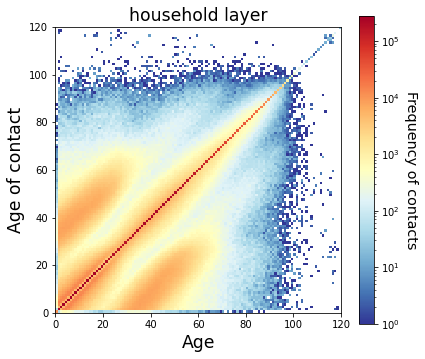

In [122]:
plot_results('household', graph_household)

<ipython-input-123-13a3fc48c880>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(type_contacts, fontsize='x-large')


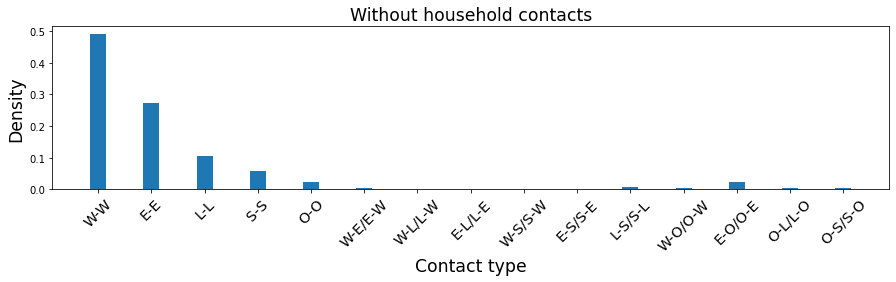

In [123]:
# il manque une ligne de code np.unique

fig, ax=plt.subplots(figsize=(15,3))
unq, cnt=np.unique(setting_temporal_network.ep['purpose'].a ,return_counts=True)

type_contacts=['W-W', 'E-E', 'L-L', 'S-S', 'O-O', 'W-E/E-W', 'W-L/L-W', 'E-L/L-E', 'W-S/S-W', 'E-S/S-E', 'L-S/S-L', 'W-O/O-W', 'E-O/O-E', 'O-L/L-O', 'O-S/S-O']

#rects1=plt.bar(['work','education','leisure','shop','other', 'hybrid'], cnt/cnt.sum()*100, 0.3)
rects1=ax.bar(type_contacts, cnt/cnt.sum(), 0.3)
ax.set_ylabel('Density', fontsize='xx-large')
ax.set_xlabel('Contact type',fontsize='xx-large')
#ax.bar_label(rects1, padding=3, rotation=60, fontsize='x-large')
ax.set_title('Without household contacts', fontsize='xx-large')
#ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(type_contacts, fontsize='x-large')

#plt.ylim(0, 75)
#plt.grid(True, lw=0.1)
plt.xticks(rotation=45)
plt.show()


fig.savefig('files/effective_contact_type.pdf', bbox_inches='tight')

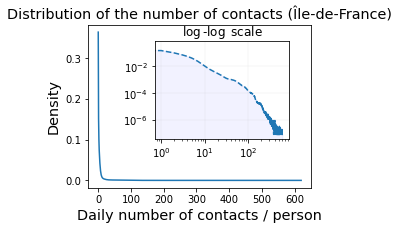

In [30]:
#setting_temporal_network.get_total_degrees(setting_temporal_network.get_vertices())

u,c=np.unique(setting_temporal_network.get_total_degrees(setting_temporal_network.get_vertices()), return_counts=True)

fig, ax=plt.subplots(figsize=(4,3))
ax.plot(u,c/c.sum())
ax.set_xlabel('Daily number of contacts / person', fontsize='x-large')
ax.set_ylabel('Density', fontsize='x-large')
#ax.grid(True, lw=0.1)
ax.set_title('Distribution of the number of contacts (Île-de-France)', fontsize='x-large')


#ax.set_xticks(u)
#ax.set_xticklabels(u,fontsize='x-large')

# inset axes....
axins = ax.inset_axes([0.3, 0.3, 0.6, 0.6])
axins.loglog(u,c/c.sum(),'--')
axins.grid(True, lw=0.1)
#ax.set_xlabel('Location size', fontsize='x-large')
#ax.set_ylabel('Density', fontsize='x-large')
axins.set_title(r'$\log$-$\log$ scale')

axins.fill_between(u, c/c.sum(), 0,
                 facecolor='orange', # The fill color
                 color='blue',       # The outline color
                 alpha=0.1/2)          # Transparency of the fill


# sub region of the original image
#x1, x2, y1, y2 = -1.5, -0.9, -2.5, -1.9
#axins.set_xlim(x1, x2)
#axins.set_ylim(y1, y2)
#axins.set_xticklabels([])
#axins.set_yticklabels([])
#ax.indicate_inset_zoom(axins, edgecolor="black")
#fig.savefig('dnc.pdf', bbox_inches='tight')
fig.savefig('dnc.jpg', bbox_inches='tight', dpi=400)
plt.show()

NameError: name 'ppary' is not defined

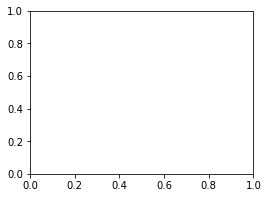

In [31]:
fig, ax=plt.subplots(figsize=(4,3))
#ax.plot(u,c)
ax.plot((ppary[1][1:]+ppary[1][:-1])/2, ppary[0]/ppary[0].sum())
ax.fill_between((ppary[1][1:]+ppary[1][:-1])/2, ppary[0]/ppary[0].sum(),0,facecolor="orange",color='blue',alpha=0.1/2)
ax.set_xlabel('Upper bound (u-b) contact durations (in hours)', fontsize='x-large')
ax.set_ylabel('Density', fontsize='x-large')
#ax.grid(True, lw=0.1)
ax.set_title('Distribution of the u-b contact durations', fontsize='x-large')

#fig.savefig('cdall.pdf', bbox_inches='tight')
fig.savefig('cdall.jpg', bbox_inches='tight', dpi=400)
plt.show()

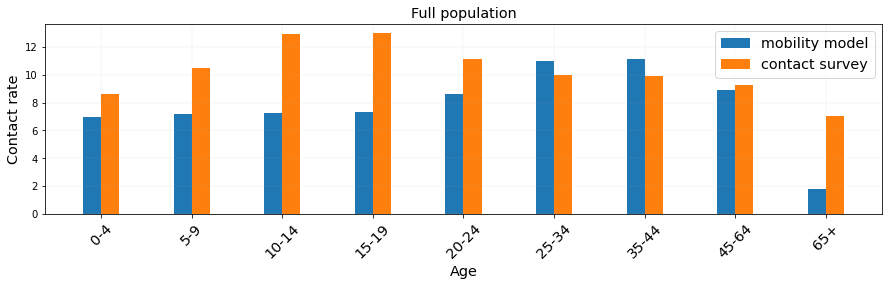

In [102]:
# get id's of persons conditioned on age

mnrc=[]

for u,v in zip([0, 5, 10, 15, 20, 25, 35, 45, 65], [5, 10, 15, 20, 25, 35, 45, 65, 120]):
    # HH
    f=np.asarray((graph_household.vp['age'].a>=u)&(graph_household.vp['age'].a<v))
    f=graph_household.get_vertices()[f]
    
    # overall
    fo=np.asarray((setting_temporal_network.vp['age'].a>=u)&(setting_temporal_network.vp['age'].a<v))
    fo=setting_temporal_network.get_vertices()[fo]
    
    #print('{}-{} - {}'.format(u,v, 1*np.round(graph_overall.get_total_degrees(f).mean(), 2)))
    
    mnrc.append(np.round(graph_household.get_total_degrees(f).mean(), 2)+np.round(setting_temporal_network.get_total_degrees(fo).mean(), 2))

size=2.
fig, ax=plt.subplots(figsize=(7.5*size,1.75*size))


n=0
#data=np.array([1, 1.26, 1.46, 1.48, 1.82, 1.70, 1.42, 1.22, 1.27])
data=np.array([8.64, 10.5, 12.92, 12.96, 11.14, 9.95, 9.93, 9.24, 7.01])
#data=data/data[n]

std=np.asarray(mnrc)
std=std#/std[0]


width=0.2
ax.bar(np.arange(len(mnrc))- width/2, std, width=width, label='mobility model')
ax.bar(np.arange(len(mnrc))+ width/2, data, width=width, label='contact survey')
ax.legend(fontsize='x-large', loc='best')
ax.grid(True, lw=0.1)
#ax.set_yticks(np.arange(4)/2)
ax.set_xlabel('Age',fontsize='x-large')
ax.set_ylabel('Contact rate',fontsize='x-large')
ax.set_xticks(np.arange(9))
ax.set_xticklabels(['0-4', '5-9', '10-14', '15-19', '20-24', '25-34', '35-44', '45-64', '65+'], rotation=45, fontsize='x-large')
# ax.axhline(y=10., color='red', lw=0.1)
ax.set_title('Full population', fontsize='x-large')

#fig.savefig('files/contacts_by_age_0.jpg', bbox_inches='tight', dpi=300)

plt.show()

In [103]:
mnrc

[6.98,
 7.1899999999999995,
 7.24,
 7.32,
 8.6,
 10.989999999999998,
 11.11,
 8.91,
 1.8399999999999999]

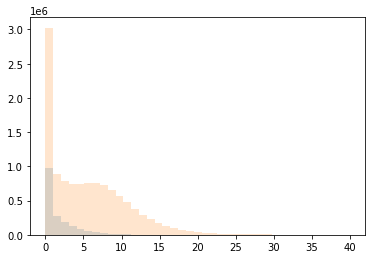

In [40]:
fo=np.asarray((setting_temporal_network.vp['age'].a>=65))
fo=setting_temporal_network.get_vertices()[fo]
fo=setting_temporal_network.get_total_degrees(fo)
plt.hist(fo, np.linspace(0, 40, 40), alpha=0.2)

fo=np.asarray((setting_temporal_network.vp['age'].a<65))
fo=setting_temporal_network.get_vertices()[fo]
fo=setting_temporal_network.get_total_degrees(fo)
#plt.hist(fo, np.linspace(0, 40, 40), alpha=0.2)

#fo=np.asarray((setting_temporal_network.vp['age'].a<65))
fo=setting_temporal_network.get_vertices()
fo=setting_temporal_network.get_total_degrees(fo)
plt.hist(fo, np.linspace(0, 40, 40), alpha=0.2)

plt.show()

In [68]:
u = GraphView(setting_temporal_network, vfilt=setting_temporal_network.vp['age'].a>=65 )
u = Graph(u, prune=True)

In [71]:
u.ep['purpose'].a

PropertyArray([3, 3, 3, ..., 2, 3, 3], dtype=int32)

In [60]:
setting_temporal_network.vp['age'].a>65

PropertyArray([67, 67, 68, ..., 57, 58, 27], dtype=int32)

<ipython-input-72-d9f0e47d1657>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(type_contacts, fontsize='x-large')


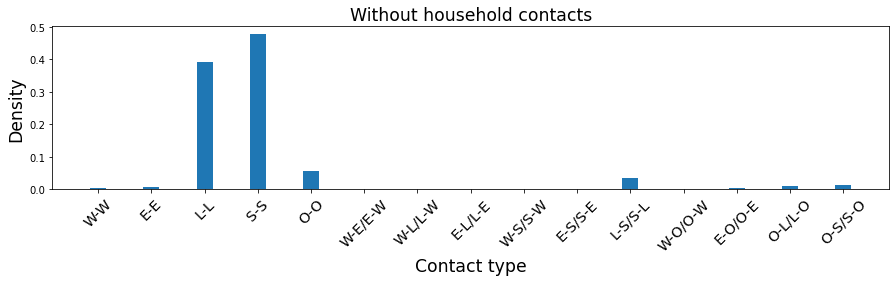

In [72]:
# il manque une ligne de code np.unique

fig, ax=plt.subplots(figsize=(15,3))
unq, cnt=np.unique(u.ep['purpose'].a ,return_counts=True)

type_contacts=['W-W', 'E-E', 'L-L', 'S-S', 'O-O', 'W-E/E-W', 'W-L/L-W', 'E-L/L-E', 'W-S/S-W', 'E-S/S-E', 'L-S/S-L', 'W-O/O-W', 'E-O/O-E', 'O-L/L-O', 'O-S/S-O']

#rects1=plt.bar(['work','education','leisure','shop','other', 'hybrid'], cnt/cnt.sum()*100, 0.3)
rects1=ax.bar(type_contacts, cnt/cnt.sum(), 0.3)
ax.set_ylabel('Density', fontsize='xx-large')
ax.set_xlabel('Contact type',fontsize='xx-large')
#ax.bar_label(rects1, padding=3, rotation=60, fontsize='x-large')
ax.set_title('Without household contacts', fontsize='xx-large')
#ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(type_contacts, fontsize='x-large')

#plt.ylim(0, 75)
#plt.grid(True, lw=0.1)
plt.xticks(rotation=45)
plt.show()


#fig.savefig('files/effective_contact_type.pdf', bbox_inches='tight')

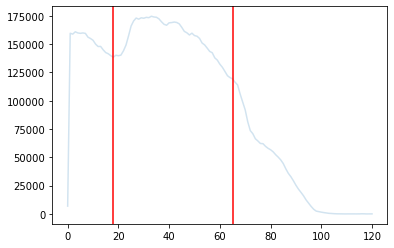

In [53]:

fo=setting_temporal_network.get_total_degrees(setting_temporal_network.get_vertices())>=0
u, c=np.unique(setting_temporal_network.vp['age'].a[fo], return_counts=True)

plt.plot(u, c, alpha=0.2)

plt.axvline(x=18, color='red')
plt.axvline(x=65, color='red')

In [41]:
setting_temporal_network.vp['age'].a[fo]

PropertyArray([67, 67, 68, ..., 57, 58, 27], dtype=int32)

In [52]:
from itertools import combinations, combinations_with_replacement
list(combinations_with_replacement('WELSO', 2))

[('W', 'W'),
 ('W', 'E'),
 ('W', 'L'),
 ('W', 'S'),
 ('W', 'O'),
 ('E', 'E'),
 ('E', 'L'),
 ('E', 'S'),
 ('E', 'O'),
 ('L', 'L'),
 ('L', 'S'),
 ('L', 'O'),
 ('S', 'S'),
 ('S', 'O'),
 ('O', 'O')]

In [132]:
_, cnt=np.unique(setting_temporal_network.ep['purpose'].a ,return_counts=True)

In [133]:
cnt

array([3918152, 1163227,  619815,  643917, 1018060,   86393,    9701,
         13248,   16198,    7456,  169609,  110680,  629078,  369565,
        433138])

In [134]:
np.round(cnt/cnt.sum()*100,2)

array([42.55, 12.63,  6.73,  6.99, 11.06,  0.94,  0.11,  0.14,  0.18,
        0.08,  1.84,  1.2 ,  6.83,  4.01,  4.7 ])

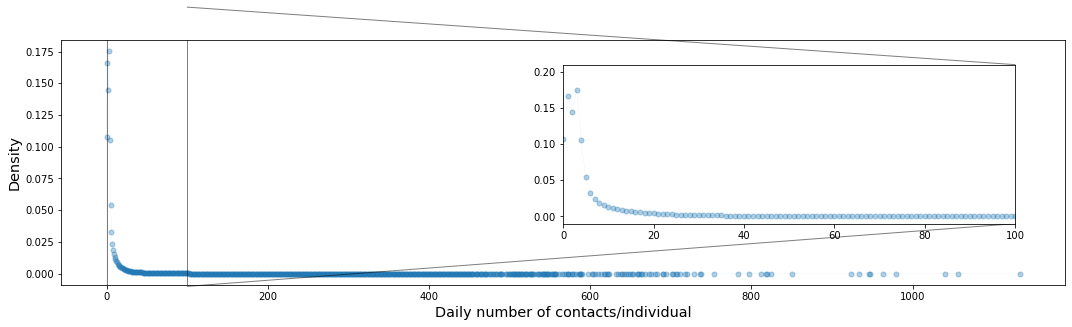

In [176]:
f1=(setting_temporal_network.vp['age'].a>65)  #&(setting_temporal_network.vp['age'].a<65)

f=setting_temporal_network.get_vertices() #[f1]
td=setting_temporal_network.get_total_degrees(f)

#
fh=graph_household.get_vertices()
tdh=graph_household.get_total_degrees(fh)

a,b=np.unique(td+tdh, return_counts=True)

scale=1.5
fig, ax=plt.subplots(figsize=(3*4*scale,3*scale))
# ax.plot(a, b, 'o', ms=2.)

ax.plot(a, b/b.sum(), '-o', ms=5., lw=0.1, alpha=0.35)
ax.axvline(x=0, color='gray', lw=0.1)

# ax.grid(True, lw=0.1)
# ax.set_xlim(5000, 6000)


ax.set_xlabel('Daily number of contacts/individual', fontsize='x-large')
ax.set_ylabel('Density', fontsize='x-large')


# inset axes
axins = ax.inset_axes([0.5, 0.25, 0.45, 0.65])
axins.plot(a, b/b.sum(), '-o', ms=5., lw=0.1, alpha=0.35)

# sub region of the original image
x1, x2, y1, y2 = 0, 100, -0.1/10, 0.21
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)


ax.indicate_inset_zoom(axins, edgecolor="black")


# ax.axvline(x=np.mean(td+tdh), color='r')
# ax.axvline(x=np.median(td+tdh), color='g')

fig.savefig('files/effective_contact_distribution.pdf', bbox_inches='tight')
plt.show()

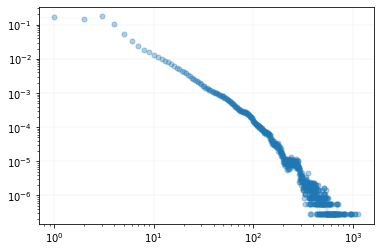

In [164]:
plt.loglog(a, b/b.sum(), '-o', ms=5., lw=0.1, alpha=0.35)
plt.grid(True, lw=0.1)

In [148]:
np.median(td+tdh)

3.0

In [224]:
setting_temporal_network.num_edges()

64806665

In [117]:
number_of_contacts_by_layer=np.zeros((5,))

for k in range(5):
    number_of_contacts_by_layer[k]=int(np.sum(setting_temporal_network.ep['purpose'].a==k))

In [120]:
observed_expected_value=number_of_contacts_by_layer*2/number_of_agents_by_layer

In [121]:
survey_expected_value=np.array([3.17, 1.55, .59, .59, .42+.85])*2.11 # (see literature for more information)

In [122]:
p=survey_expected_value/observed_expected_value

In [123]:
p

array([0.04008045, 0.06735285, 0.04726898, 0.05328411, 0.4585973 ])

In [125]:
(td+tdh).mean()

91.7418439973669

In [126]:
np.median(td+tdh)

6.0

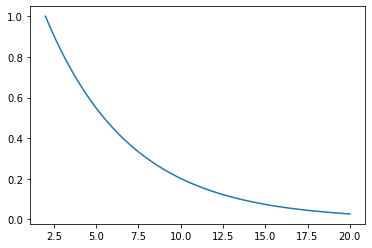

In [49]:
w=.2
x=np.linspace(2, 20, 100)
y=np.exp((2-x)*w)
plt.plot(x, y)

In [54]:
(setting_temporal_network.vp['age'].a>25)&(setting_temporal_network.vp['age'].a<65)

PropertyArray([ True, False, False, ...,  True,  True,  True])

In [135]:
from tqdm import tqdm

list_of_links=[]

ws=15.
cpt=0
st=time.time()
with tqdm(total=len(out), position=0, leave=True) as pbar:

    for group in out:
        location=group[0,1]
        arry_tf=compute_timelines_2(group)
        timelines, ids=arry_tf, group[:,0]
        
        mgd2=np.unique(ids)
        if len(ids)!=len(mgd2):
            mgd=merge_timelines(timelines, ids)
        else:
            mgd=timelines
                

        if len(mgd2)>1:
            # dc=detect_contact(mgd2, mgd, ws)
            id_ex_dict=dict([(i,j) for i,j in zip(np.arange(len(mgd2)),mgd2)])
    
            n=len(mgd2)
            #iterator=random_graph(n, lambda: sample_d(ws, n), directed=False).get_edges() # random graph / can be seen as the in-place spatial constraint
            iterator=random_graph(n, lambda: sample_k(40), model="probabilistic-configuration", edge_probs=lambda i, k: 1.0 / (1 + abs(i - k)), directed=False).get_edges()
            
            # iterator=nump2_jitted(len(mgd2), 2)
            llpp=[]
            llpp.extend(full(iterator, mgd, mgd2))
            list_of_links.extend([(mapping[edge[0]], mapping[edge[1]], location, len(mgd2)) for edge in llpp])

        pbar.update(1)
        cpt+=1
        if cpt>5000:
            break
            
print(time.time()-st)

  1%|▏         | 5001/359023 [00:44<52:18, 112.80it/s] 

44.33891296386719


In [ ]:
iterator

In [123]:
from tqdm import tqdm
from numba import jit, njit


@jit(nopython=True)
def run(out):
    list_of_links=[]
    ws=15.

    for group in out:
        location=group[0,1]
        arry_tf=compute_timelines_2(group)
        timelines, ids=arry_tf, group[:,0]

        mgd2=np.unique(ids)
        if len(ids)!=len(mgd2):
            mgd=merge_timelines(timelines, ids)
        else:
            mgd=timelines


        if len(mgd2)>1:
            # dc=detect_contact(mgd2, mgd, ws)
            id_ex_dict=dict()
            for k, l in zip(range(len(mgd2)), mgd2):
                id_ex_dict[k]=l

            n=len(mgd2)
            # iterator=random_graph(n, lambda: sample_d(ws, n), directed=False).get_edges() # random graph / can be seen as the in-place spatial constraint

            iterator=nump2_jitted(len(mgd2), 2)
            llpp=[]
            llpp.extend(full(iterator, mgd, mgd2))
            list_of_links.extend([(edge[0], edge[1], location, len(mgd2)) for edge in llpp])
    print(len(list_of_links))

In [125]:
st=time.time()
run(out)        
print('completed !')
print(np.round(time.time()-st, 2), 'secs')

510347
completed !
12.64 secs


In [3]:
import numpy as np

n=10
timelines=np.random.randint(0, 2, n*5).reshape((n,-1))
links=nump2_jitted(n, 2)
d=np.arange(n)

res=full(links, timelines, d)

In [4]:
# full.parallel_diagnostics(level=2)

# np.array_split(np.array([0, 0, 0, 0, 1]), np.where(np.array([0, 0, 0, 0, 1])==0)[0])

In [81]:

n=2
w=()


w*(n-1)/(w+n-1)

0.999000999000999

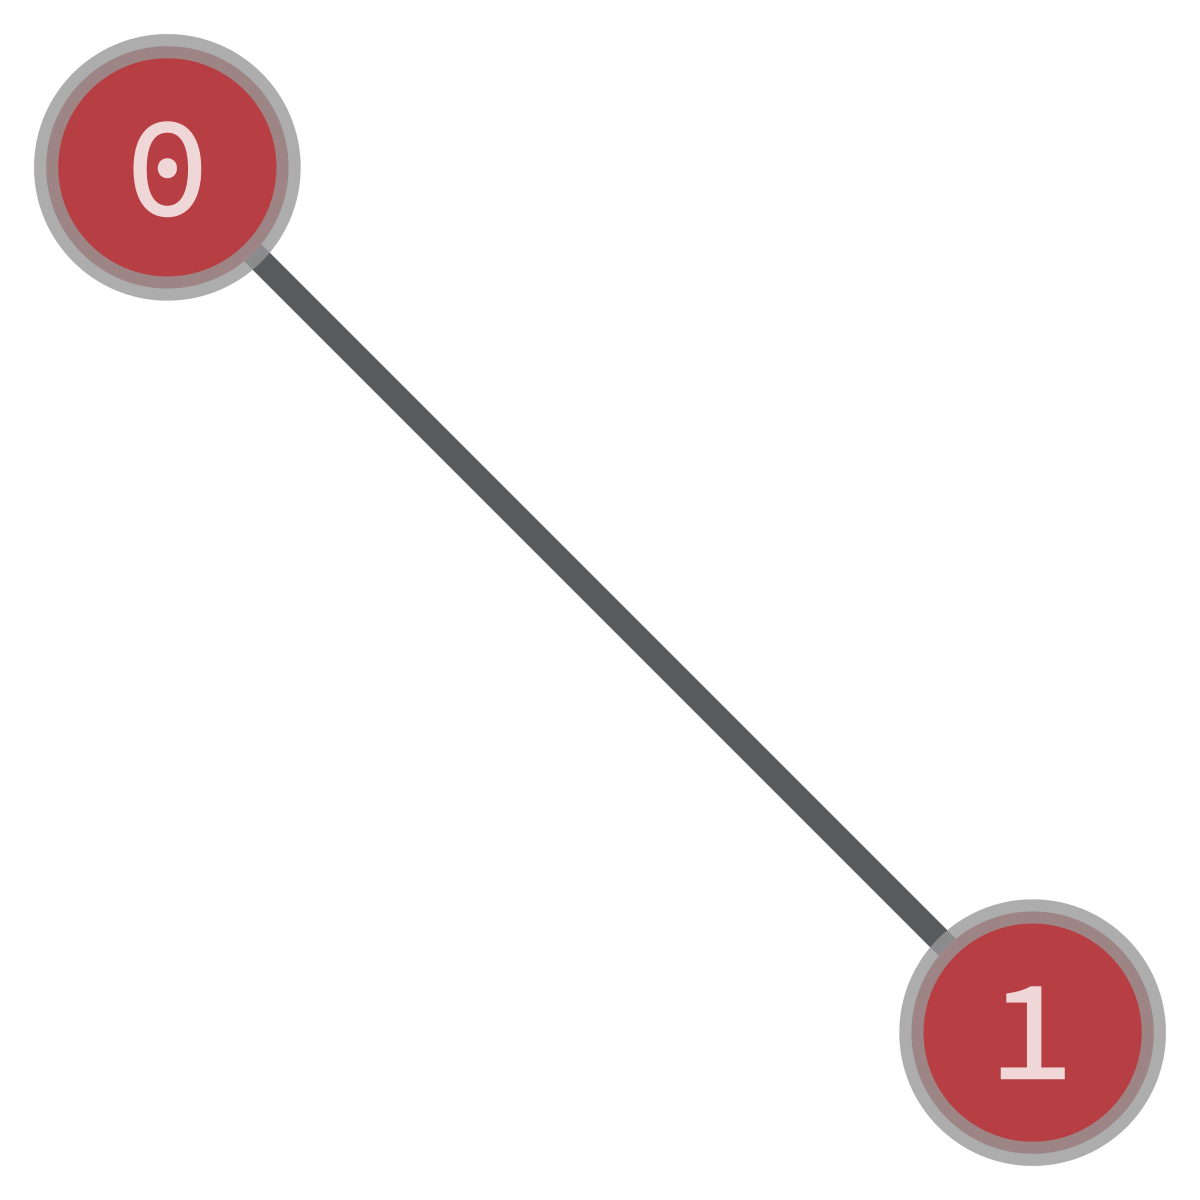

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f015f8b6c40, at 0x7f015f8b6fa0>

In [114]:
def sample_d(ws=45., n=10):
    mean=ws*(n-1)/(ws+n-1)
    std=np.sqrt(0.15)
    variance=std**2
    

    scale=variance/mean
    shape=mean/scale
    
    avg=np.random.gamma(shape=shape, scale=scale, size=1)[0]

    return np.random.poisson(avg, 1)[0]



n=2
rg=random_graph(n, lambda: sample_d(20, n), directed=False)
rg.get_total_degrees(rg.get_vertices())>(n-1)

graph_draw(rg, vertex_text=rg.vertex_index)

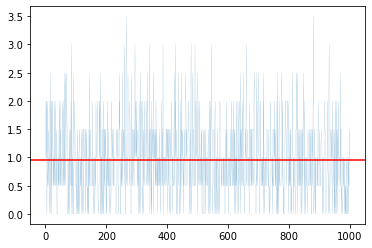

In [161]:
w=10.
n=np.ones((1000,), dtype=int)*2
y=[np.random.poisson(w*(k-1)/(w+k-1), k).mean() for k in n]

plt.plot(np.arange(len(n)), y, '-', lw=0.1)
plt.axhline(y=np.mean(y), color='red')
# plt.plot([1, np.max(n)], [0, np.max(n)-1])

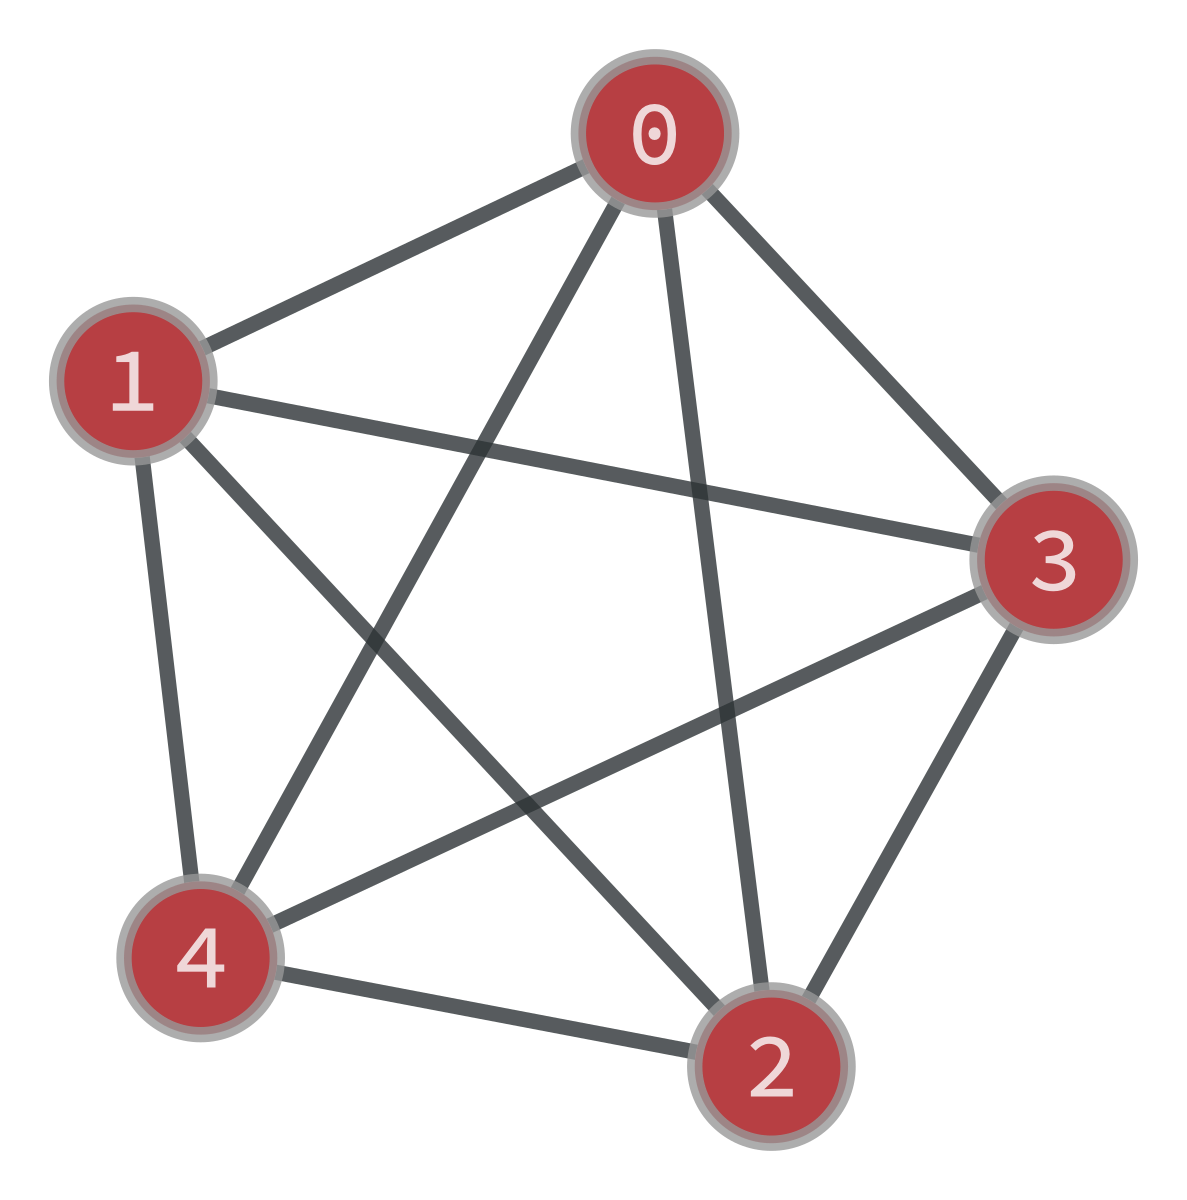

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f015a842d00, at 0x7f015961a5b0>

In [254]:
rg=complete_graph(5)
graph_draw(rg, vertex_text=rg.vertex_index)

In [53]:
# Effects of sampling

def get_sampled_graph(graph, frn):
    # frn=0.10 # fraction of removed nodes

    n=graph.num_vertices()
    c=np.zeros((n, ), dtype=bool)
    f=np.random.choice(n, size=int(np.round(n*(1-frn))), replace=False)
    c[f]=True

    u = GraphView(graph, vfilt=c)
    return Graph(u, prune=True)


graph_10=get_sampled_graph(setting_temporal_network, 0.1)
graph_20=get_sampled_graph(setting_temporal_network, 0.2)
graph_40=get_sampled_graph(setting_temporal_network, 0.4)
graph_60=get_sampled_graph(setting_temporal_network, 0.6)

In [55]:
graph_70=get_sampled_graph(setting_temporal_network, 0.7)

In [57]:
graphs=[setting_temporal_network, graph_10, graph_20, graph_40, graph_60, graph_70]

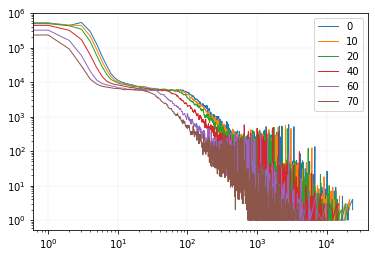

In [58]:
fig, ax=plt.subplots()
labels=['0', '10', '20', '40', '60', '70']
for mygraph, label in zip(graphs, labels):
    un, cn=np.unique(mygraph.get_total_degrees(mygraph.get_vertices()), return_counts=True)
    #v, w=np.histogram(graph_overall.get_total_degrees(graph_overall.get_vertices()), bins=bins, density=True)
    #plt.plot((w[1:]+w[:-1])/2, v)
    
    plt.loglog(un, cn, '-',lw=1, label=label)

    
plt.grid(True, lw=0.1)
#lt.xlim(-1, 40)
plt.legend(loc='best')

In [336]:
def compute_density(graph):
    n=graph.num_vertices()
    return graph.num_edges()/((n-1)*n/2)


for g in graphs:
    print(compute_density(g))

3.379844297601637e-06
3.378902645381835e-06
3.3806705287111764e-06
3.3793184416229773e-06
3.3800340464248796e-06
3.3800736558033323e-06


In [281]:
un, cn=np.unique(graph_overall.get_total_degrees(graph_overall.get_vertices()), return_counts=True)

In [283]:
lenf(un)

148

In [271]:
# SIR model

print('Number of vertices: {} / Number of edges: {}'.format(graph_overall.num_vertices(), graph_overall.num_edges()))


Number of vertices: 3527402 / Number of edges: 21026960


In [63]:
from tqdm import tqdm

niter=2000
state = SIRState(setting_temporal_network, beta=1/100, gamma=0.0025, exposed=True)
S, X, R, E = [], [], [], []

with tqdm(total=niter) as pbar:
    for t in range(niter):
        ret = state.iterate_sync()
        s = state.get_state().fa
        S.append((s == 0).sum())
        E.append((s == -1).sum())
        X.append((s == 1).sum())
        R.append((s == 2).sum())
        pbar.update(1)

100%|██████████| 2000/2000 [05:21<00:00,  6.22it/s]


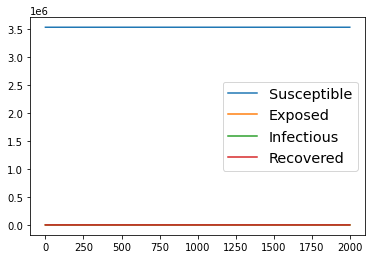

In [64]:
plt.plot(S, label="Susceptible")
plt.plot(E, label="Exposed")
plt.plot(X, label="Infectious")
plt.plot(R, label="Recovered")
plt.legend(loc='best', fontsize='x-large')

In [203]:
state.get_state().fa.shape

(3527402,)

In [39]:
diff=[]


for k in (np.arange(100)+10):    
    n=k

    n_A=0.7*n
    n_B=0.3*n

    n_A_A=1/2*n
    n_B_A=0

    n_B_B=0.3*n
    n_A_B=n/2-n_B_B


    pi_AA=(n_A-1)/(n_A+n_B-1)


    pi_AA_A=(n_A-1)/(n_A-1)
    pi_AA_B=(n_A_B-1)/(n_A_B+n_B_B-1)

    diff.append(pi_AA-(pi_AA_A*1/2+pi_AA_B*1/2))

In [35]:
pi_AA-(pi_AA_A*1/2+pi_AA_B*1/2)

0.04166666666666663

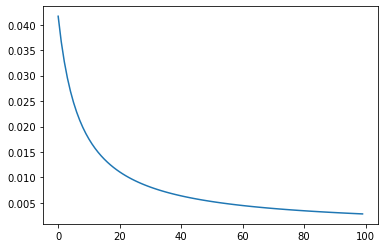

In [40]:
plt.plot(diff)

In [42]:
17/30

0.5666666666666667